In [1]:
import math
import jieba
import numpy as np
import pandas as pd

In [52]:
f = open('fanju.txt','r')
lines = f.readlines()
intToFanju = dict()
for line in lines:
    split = line.split(',')
    key = int(split[0])/1000
    intToFanju[key] = split[1].split('\\')[1].strip()

In [647]:
intToFanju[1000]

'超人高中生们即便在异世界也能从容生存'

In [2]:
def jiebaUtil():
    new_words = []
    f = open("new_words_all.txt")
    lines = f.readlines()
    for line in lines:
        split = line.strip().split(',')
        new_words.append((split[0],int(split[1])))
    f.close()
    for key_word in new_words:
        if key_word[1] > 2:
            jieba.add_word(key_word[0], freq = key_word[1]*10, tag = None)

In [3]:
jiebaUtil()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.727 seconds.
Prefix dict has been built successfully.


In [4]:
def read_dictionary():
    f = open("blocks_fanju//block_1.csv")
    lines = f.readlines()
    dictionary = dict()
    for line in lines:
        split = line.strip().split(',')
        for i in split[2:]:
            if split[0] in dictionary:
                dictionary[split[0]].append(i)
            else:
                dictionary[split[0]] = [i]
    return dictionary

In [5]:
def read_doc_len():
    f = open("doclen_fanju.txt")
    lines = f.readlines()
    doc_len = dict()
    for line in lines:
        split = line.strip().split('-')
        doc_len[int(split[0])] = int(split[1])
    return doc_len

In [6]:
dictionary = read_dictionary()

In [619]:
doc_len = read_doc_len()

In [620]:
len(doc_len)

1201

In [10]:
def similartity(doc_len={}, dictionary={},k=1.2, b=0.75):
    m = len(dictionary)
    n = len(doc_len)
    matrix = [[0 for i in range(m)] for j in range(1213)]
    idf = dict()
    N = len(doc_len)
    avg_doclen = sum(doc_len.values())/N
    c = 0
    for key in dictionary:
        idf[key] = 1.0 + math.log(N / len(dictionary[key]))
        for item in dictionary[key]:
            split = item.split('-')
            fanju = int(split[0])
            cnt = int(split[1])
            matrix[int(fanju/1000-1)][c] = idf[key] * (k + 1) * cnt / (k * (1 - b + b*(doc_len[fanju] / avg_doclen))+ cnt)
        c+=1
    return matrix

In [11]:
matrix = similartity(doc_len, dictionary)

In [3]:
def gengbaike(text, doc_len={}, dictionary={}, top=10, k=1.2, b=0.75):
    query = []
    words = jieba.lcut(line)
    for word in words:
        query.append(word)
    scores = dict()
    idf = dict()
    N = len(doc_len)
    avg_doclen = sum(doc_len.values())/N
    for doc in doc_len:
        scores[doc] = 0
    for key in query:
        idf[key] = 1.0 + math.log(N / len(dictionary[key]))
        if key not in dictionary.keys():
            continue
        for item in dictionary[key]:
            split = item.split('-')
            juji = int(split[0])
            cnt = int(split[1])
            scores[juji] += idf[key] * (k + 1) * cnt / (k * (1 - b + b*(doc_len[juji] / avg_doclen))+ cnt)
    scores_list = []
    for key in scores:
        scores_list.append((key,intToJuji[key],scores[key]))
    scores_list.sort(key = lambda x: x[2], reverse = True)
    return scores_list[:top]

In [12]:
matrix=np.array(matrix)

OSError: [Errno 28] No space left on device

In [ ]:
def writeMatrix(matrix):
    f = open('matrix_vector.txt','w', encoding="utf-8")
    for i in range(len(res)):
        f.write(dic[res[i][0]])
        for j in res[i][1:]:
            f.write(',')
            f.write(dic[j])
        f.write('\n')
        f.write('\n')
    f.close()

In [14]:
df = pd.DataFrame(matrix)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,327597,327598,327599,327600,327601,327602,327603,327604,327605,327606
0,0.000000,3.342490,0.0,0.000000,4.640262,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.706476,3.273791,0.0,8.571623,4.762893,0.0,0.0,7.333436,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,3.384576,0.0,0.000000,5.084956,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.036801,3.202098,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [18]:
pca = PCA()
pca.fit(df)
n_component = 0
while sum(pca.explained_variance_ratio_[0: n_component]) < 0.9:
    n_component += 1
pca = PCA(n_components=n_component)
df = pca.fit_transform(df)
print(df.shape)

(1213, 582)


In [17]:
from sklearn.decomposition import PCA

In [19]:
df

array([[-7.01893708e+01,  4.86268651e-01, -1.16823380e+01, ...,
         1.27617811e+01, -5.17069468e+00, -1.20304902e+01],
       [-5.31634381e+01, -1.01502374e+00,  1.45201508e+01, ...,
        -9.47951533e+00, -2.09953745e+00,  8.12869998e-03],
       [ 1.36922615e+02, -5.71885366e+01, -5.57727283e+01, ...,
        -3.80740214e-01,  9.27737283e-01, -7.04732601e-01],
       ...,
       [-7.09201960e+01,  4.20804191e+00,  1.35375658e+01, ...,
         3.23313486e+00, -4.18161960e+00,  7.17189428e+00],
       [-1.10294515e+02, -4.15399110e+00,  5.68131632e+00, ...,
        -5.42018736e-01, -1.06433338e-01,  6.63866332e-01],
       [-1.17837348e+02, -3.40087614e+00,  4.18530354e+00, ...,
        -1.04194576e+00,  2.03325403e+00,  7.86318533e-01]])

In [426]:
model = KMeans(n_clusters=100).fit(df)

In [427]:
predict_value = model.labels_
print("轮廓系数: ", metrics.silhouette_score(df, model.labels_, metric='euclidean'))

轮廓系数:  0.1983047849152659


In [428]:
dataframe1 =  pd.DataFrame(df)
counts = pd.Series(model.labels_).value_counts()
centers = pd.DataFrame(model.cluster_centers_, columns = dataframe1.columns)
dataframe2 = pd.concat([counts, centers], axis = 1)
dataframe2.columns = ['count']+ list(dataframe1.columns)
dataframe2[dataframe2['count'] != 1]

,count,0,1,2,3,4,5,6,7,8,...,572,573,574,575,576,577,578,579,580,581
1,507,-99.839653,-0.270035,3.254023,16.008683,2.043543,-2.486410,0.541732,-5.157508,3.681870,...,0.038557,0.132723,-0.059777,0.034381,-0.360191,-0.023078,-0.082617,0.231825,-0.363712,-0.411062
2,38,104.217126,-79.895931,-60.990595,-15.397291,-14.436452,-0.141847,-26.117070,-6.801811,28.750269,...,-0.138006,0.214634,0.499647,-0.236299,0.047558,0.033914,0.040493,-0.149321,0.064708,0.253762
3,7,39.146563,-47.027083,-7.133113,19.280953,-21.271619,25.435205,-14.099245,76.559920,9.579035,...,-0.276682,0.758393,-2.038032,0.208689,-1.555371,1.191017,-0.393376,-3.256606,3.255872,-0.411995
35,10,131.587041,41.568196,137.018766,-8.361493,29.857308,-92.637828,-126.377360,7.152566,-12.251689,...,-1.250833,-0.107855,2.965039,0.956510,-0.260515,-1.568769,-1.034385,0.180520,2.628708,-1.741042
42,79,104.359063,74.503417,-38.953768,-23.364334,-28.378626,1.131164,-1.236133,0.530653,0.436098,...,-0.513027,-0.492642,-0.228626,1.082409,0.089315,0.622801,0.231004,0.200090,-1.001996,0.030901
43,2,395.765286,36.844178,116.517804,265.589245,-30.393973,55.168176,219.598734,-208.423697,25.695245,...,-2.227479,-5.481238,3.988188,2.861977,-3.203806,-5.502277,6.877566,0.047240,-3.053078,4.343920
55,2,143.535703,-72.961401,31.634409,70.621988,-29.545299,40.615796,-28.348554,237.328748,27.674380,...,2.373580,-2.722136,0.485188,-1.321825,0.822632,-0.737533,0.196673,0.316451,-0.375265,0.094867
58,310,-14.041438,9.670177,-2.202688,-23.170913,-1.406875,9.693239,-1.051273,7.450149,-8.070576,...,0.070579,-0.027763,0.004740,-0.265839,0.820199,0.025807,0.210081,-0.392110,0.771094,0.801025
92,167,127.187022,-42.016412,10.303236,-11.093666,5.746422,-3.906549,10.482043,0.171453,-4.450720,...,0.012846,-0.188459,0.056625,-0.040129,-0.375345,-0.138368,-0.289476,-0.108332,-0.076087,-0.103156


In [429]:
result = pd.concat([ pd.Series(model.labels_, index = dataframe1.index)], axis = 1)
result.columns =  ['categories']
result.head()

,categories
0,1
1,58
2,92
3,58
4,58


In [430]:
r1 = result.copy()

In [431]:
r1['name'] = r1.index + 1

In [432]:
r1['name'] = r1['name'].apply(lambda x :intToFanju[x])

In [433]:
r1

,categories,name
0,1,0号宿舍
1,58,11eyes
2,92,227
3,58,ACCA13区监察课
4,58,ACHANNEL
...,...,...
1208,1,龙娘七七七埋藏的宝藏
1209,92,龙王的工作
1210,1,龙的牙医
1211,1,龙鸣


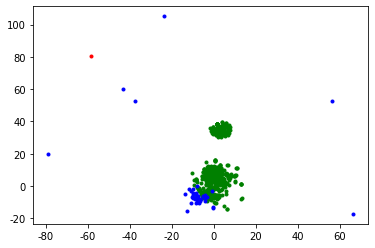

In [434]:
tsne = TSNE()
tsne.fit_transform(dataframe1)
tsne = pd.DataFrame(tsne.embedding_, index = dataframe1.index)
plt.rcParams['axes.unicode_minus'] = False
color = ['r.','g.','b.','y.']
for i in range(3):
    d = tsne[r1['categories'] == i]
    plt.plot(d[0], d[1], color[i])
plt.show()

In [422]:
a = []
for r in r1[r1['categories']==72]['name']:
    a.append(r)
print(len(a))
print(a)

94
['AKB0048第一季', 'AKB0048第二季', 'BEM', 'CAROLETUESDAY', 'Code', 'DancewithDevils', 'DAYS', 'Free-DivetotheFuture-', 'IDOLiSH7-偶像星愿-', 'KRETURNOFKINGS', 'MIX', 'NANA', 'RobiHachi', 'SA特优生', 'SHOWBYROCK第二季', 'TRICKSTER', 'TSUKIPRO', '×××HOLiC', '不可思议星球的双胞胎公主', '不愉快的怪物庵续', '东京猫猫', '乌冬面之国的金色毛球', '乌龙派出所', '书店里的骷髅店员本田', '人鱼的旋律', '他和她的故事', '众神的恶作剧', '伯爵与妖精', '偶像梦幻祭', '元气囝仔', '元气少女缘结神◎', '兄弟战争', '光能使者', '冷然之天秤', '动物狂想曲BEASTARS', '十二国记', '博多豚骨拉面团', '厨病激发男孩', '变形金刚领袖之证美版第一季', '复仇者世上最强英雄组合', '夏目友人帐', '天真与闪电', '失忆症', '奇幻贵公子', '宝石之国', '宝石商人理查德的谜鉴定', '实况主的逃脱游戏', '小木乃伊到我家', '小绿和小蓝', '小马宝莉第一季', '少女革命', '幸腹涂鸦', '弦音-风舞高中弓道部-', '强风吹拂', '彩云国物语', '思维覆写', '怪盗圣少女', '恋爱情结', '悲惨世界少女珂赛特', '我太受欢迎了该怎么办', '战刻夜想曲', '排球少年', '明治东京恋伽', '暗黑破坏神在身边', '最游记', '月歌', '梦之祭', '欢迎光临樱兰高校', '歌之☆王子殿下真爱REVOLUTIONS', '歌舞伎町夏洛克', '潘朵拉之心', '爱丽丝学园', '猫眼三姐妹', '玩偶游戏', '目隐都市的演绎者', '索玛丽与森林之神', '约定的梦幻岛', '终结的炽天使', '翼·年代记', '舞动青春', '莎拉公主', '蜡笔小新第六季中文', '覆面系NOISE', '赤发白雪姬第一季', '超心动艺术之星', '路人超能100II灵能百分百第二季)', '钻石王牌', '钻石王牌actII前半', '银仙', '魔卡少女

In [89]:
a = []
for r in r1[r1['categories']==8]['name']:
    a.append(r)
print(len(a))
print(a)

338
['11eyes', 'ACCA13区监察课', 'ACHANNEL', 'AKB0048第一季', 'AKB0048第二季', 'B-PROJECT～绝顶＊Emotion～', 'BanGDream少女乐团派对☆PICO', 'BUDDYCOMPLEX', 'Caligula卡里古拉', 'CAROLE & TUESDAY', 'CDE', 'Classroom☆Crisis', 'CodeRealize～创世的姬君～', 'DaDaDa', 'DAYS', 'EVA新世纪福音战士', 'FORTUNEARTERIAL-赤之约定-', 'GANGSTA', 'GOSICK', 'Infini-TForce', 'JOJO的奇妙冒险', 'JOJO的奇妙冒险-星尘斗士', 'JOJO的奇妙冒险-星尘斗士-埃及篇', 'K', 'KARNEVAL狂欢节', 'LoveLiveSchoolIdolProject', 'MegaloBox', 'MYSELF;YOURSELF', 'OneRoom第二季', 'OVERLORD', 'OZMAFIA', 'PHI·BRAIN神之谜题第一季', 'RAILWARS-日本国有铁道公安队-', 'ReLIFE完结篇', 'Re：从零开始的异世界生活 新编集版', 'RWBY', 'SACREDSEVEN', 'SchoolgirlStrikers', 'SHUFFLE', 'SOLA', 'STARDRIVER闪亮的塔科特', 'TARITARI', 'TRICKSTER', 'TSUKIPRO', 'UN-GO因果论', 'WWW迷糊餐厅', 'X战记', '[C]THEMONEYOFSOULANDPOSSIBILITYCONTROL', '一个人的〇〇小日子', '不可思议星球的双胞胎公主Gyu', '不愉快的怪物庵', '世界征服谋略之星', '丹特丽安的书架', '乌龙派出所', '乒乓', '书店里的骷髅店员本田', '交响诗篇第一季', '人鱼之森', '他和她的故事', '付丧神出租中', '传颂之物', '伯纳德小姐说', '伽利略少女', '便·当', '信长之枪', '偶像大师SideM', '偶像选举', '傀儡师左近', '僵尸借贷', '元气少女缘结神◎', '光明之心～幸福的面包～', '光能

In [90]:
a = []
for r in r1[r1['categories']==9]['name']:
    a.append(r)
print(len(a))
print(a)

330
['227', 'AIR', 'AngelBeats', 'AngelsofDeath', 'AngeVierge', 'ANIMAYELL', 'AnneHappy', 'BanGDream', 'BanGDream第二季', 'BEM', 'CAROLETUESDAY', 'CHAOS;CHILD', 'Charlotte', 'CLANNAD', 'Code', 'ComicGirls', 'COPCRAFT', 'DancewithDevils', 'DARKERTHANBLACK-黑之契约者-', 'FateApocrypha', 'FateEXTRALastEncore', 'Fatestaynight06版', 'Fatestaynight[UnlimitedBladeWorks]第一季', 'Fatestaynight[UnlimitedBladeWorks]第二季', 'FateZero第一季', 'Free-DivetotheFuture-', 'GAMERS电玩咖', 'HandShakers', 'IDOLiSH7-偶像星愿-', 'InfiniteStratos2', 'ISLAND', 'JOJO的奇妙冒险-不灭钻石', 'JOJO的奇妙冒险-黄金之风', 'JOJO的奇妙冒险黄金之风', 'JustBecause', 'KERORO军曹', 'KRETURNOFKINGS', 'LOSTSONG失落的歌谣', 'LoveLiveSchoolIdolProject第二季', 'LoveLiveSunshine', 'MIX', 'NANA', 'NEWGAME', 'NOGAMENOLIFE游戏人生', 'OVERLORDⅢ', 'pop子和pipi美的日常', 'Regalia三圣星', 'RErideD-穿越时空的德理达', 'revisions', 'Rewrite2ndSeason', 'Re从零开始的异世界生活新编集版', 'Re创造主', 'RobiHachi', 'SA特优生', 'SHOWBYROCK第二季', 'SlowStart', 'ULTRAMAN机动奥特曼', 'UQHOLDER悠久持有者', 'ViVidStrike', 'WZ', '×××HOLiC', '一起一起这里那里', '三坪房间的侵略者',

2 68.71144912218615
3 36.549479239062734
4 25.049924637834025
5 19.368473141388012
6 16.819592269441237
7 13.96282314838239
8 14.063754222453014
9 11.972746941136776
10 11.88635015159144
11 10.89472541743535
12 10.273548795713989
13 10.325659648486115
14 8.911036002796097
15 9.449182131806708
16 8.415671852101166
17 8.580779759198498
18 8.18263335729132
19 7.556093936618753
20 7.790636893195352
21 7.807196583578209
22 7.953590653407833
23 7.120726472448862
24 7.292039374876541
25 7.286772721024927
26 7.108445505383497
27 6.974639855093637
28 6.76212237127369
29 6.462982331061955
30 6.676447187120259
31 6.4896974333824815
32 6.509271570711479
33 6.101977197386295
34 6.25611934230529
35 6.313613266295006
36 6.284578323685491
37 6.092013955538651
38 5.944398690637899
39 5.951165389775938


Text(0, 0.5, 'calinski_harabasz_score')

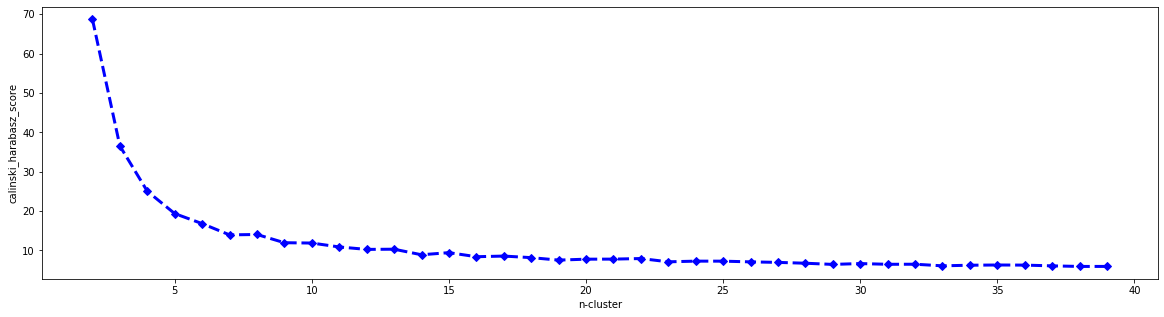

In [31]:
silhouettescore=[]
for i in range(2,40):
    model =KMeans(n_clusters = i).fit(df)
    score = metrics.calinski_harabasz_score(df, model.labels_)
    silhouettescore.append(score)
    print(i,score)

# 绘制轮廓系数与聚类数量关系的折线图
fig = plt.figure(figsize = (20,5))
plt.plot(range(2,40),silhouettescore,linewidth = 3,linestyle = '--',marker = "D",color = "blue")
plt.xlabel("n-cluster")
plt.ylabel("calinski_harabasz_score")

2 0.3680014454071197
3 0.3649674768232402
4 0.3607136796970398
5 0.2524738940176012
6 0.3631992290623086
7 0.3667557462539872
8 0.3612093341890868
9 0.35910932581072064
10 0.33964510565106737
11 0.3204249867601258
12 0.33993487434926206
13 0.3550351747242934
14 0.350088702052832
15 0.35633069482617774
16 0.3670116477059975
17 0.2523011596073029
18 0.23438748421447295
19 0.18569113033288417
20 0.19911852208966663
21 0.35455338364692907
22 0.20005406450050847
23 0.27903858833993594
24 0.22406613165158726
25 0.20057879726511696
26 0.19783543011815907
27 0.1800792867973783
28 0.34101344693201896
29 0.21327075852020738
30 0.19320914948139237
31 0.20507497142340433
32 0.18816199364183264
33 0.20158098246756914
34 0.20933744922764358
35 0.20272770514690308
36 0.19455668288067132
37 0.2013586948429019
38 0.1900356097342003
39 0.20034747316693327


Text(0, 0.5, 'silhouette_score')

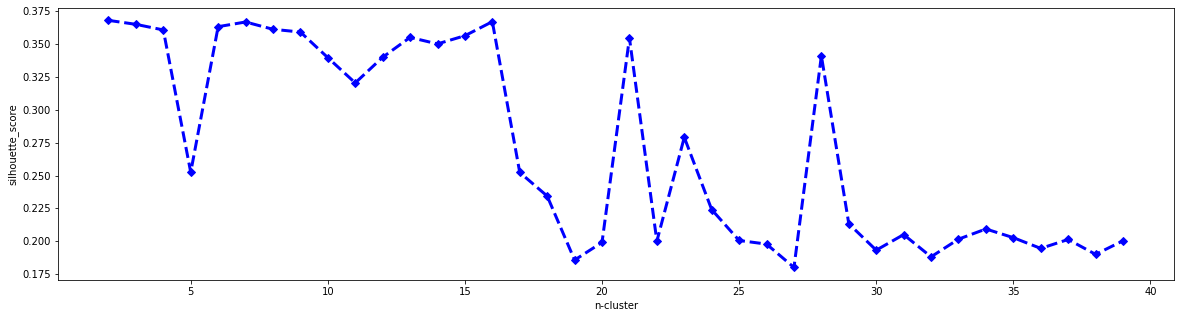

In [156]:
silhouettescore=[]
for i in range(2,40):
    model =KMeans(n_clusters = i).fit(df)
    score = metrics.silhouette_score(df, model.labels_, metric='euclidean')
    silhouettescore.append(score)
    print(i,score)
# 绘制轮廓系数与聚类数量关系的折线图
fig = plt.figure(figsize = (20,5))
plt.plot(range(2,40),silhouettescore,linewidth = 3,linestyle = '--',marker = "D",color = "blue")
plt.xlabel("n-cluster")
plt.ylabel("silhouette_score")

2 0.3680014454071197
3 0.3658203514497541
4 0.3681985271337342
5 0.3658973910860834
6 0.28555312167296765
7 0.22070895410303232
8 0.3667517605031329
9 0.28176741425312996
10 0.2559439623236192
11 0.3620917449640725
12 0.2805277671935318
13 0.3504418696372844
14 0.30792843237827155
15 0.3379281325840646
16 0.29050917130072135
17 0.3602192324983866
18 0.20848207078049538
19 0.300772156111512
20 0.2057501487801515
21 0.1813595972784958
22 0.2644324156971502
23 0.20175971484520622
24 0.1996860969927602
25 0.19731756501692385
26 0.20659717817390905
27 0.20139454703270712
28 0.18812298375645872
29 0.18771079797232113
30 0.3316798808936357
31 0.18969926565719025
32 0.18317093312142085
33 0.28424475959760065
34 0.1920038895306912
35 0.18553598861872203
36 0.17953616241871911
37 0.20980448565257212
38 0.19373661464464478
39 0.2035530510933667


Text(0, 0.5, 'silhouette_score')

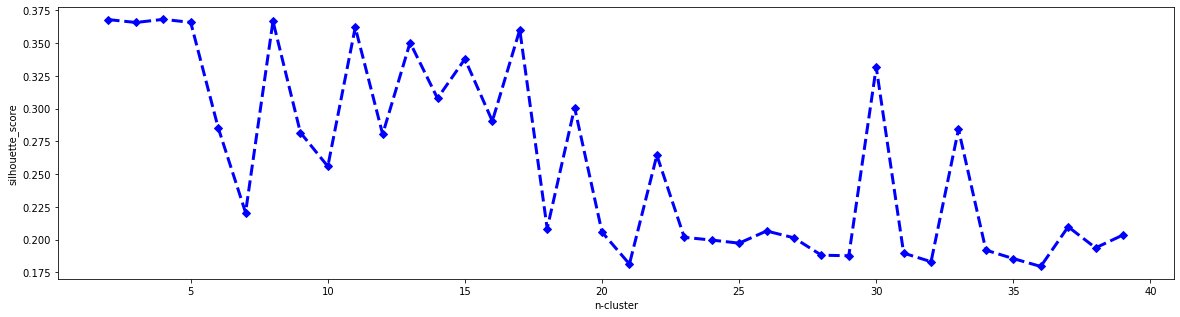

In [30]:
silhouettescore=[]
for i in range(2,40):
    model =KMeans(n_clusters = i).fit(df)
    score = metrics.silhouette_score(df, model.labels_, metric='euclidean')
    silhouettescore.append(score)
    print(i,score)
# 绘制轮廓系数与聚类数量关系的折线图
fig = plt.figure(figsize = (20,5))
plt.plot(range(2,40),silhouettescore,linewidth = 3,linestyle = '--',marker = "D",color = "blue")
plt.xlabel("n-cluster")
plt.ylabel("silhouette_score")

40 0.19039970244204998
41 0.20429414882117788
42 0.19495347016456016
43 0.18543421977341343
44 0.32533161399761823
45 0.18977872820237165
46 0.19044567041580948
47 0.1870348716650554
48 0.10581482733945706
49 0.18851066357818483
50 0.19013113331463424
51 0.19004048347933605
52 0.22646467795848416
53 0.21885960665842197
54 0.18920324528098226
55 0.19271450578970992
56 0.19034910216110157
57 0.19482747474741577
58 0.18807039003696613
59 0.19028692185987175


Text(0, 0.5, 'silhouette_score')

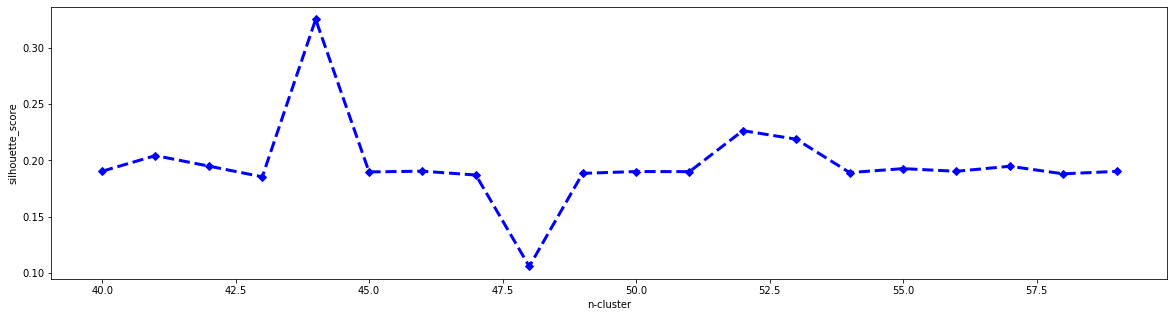

In [109]:
silhouettescore=[]
for i in range(40,60):
    model =KMeans(n_clusters = i).fit(df)
    score = metrics.silhouette_score(df, model.labels_, metric='euclidean')
    silhouettescore.append(score)
    print(i,score)
# 绘制轮廓系数与聚类数量关系的折线图
fig = plt.figure(figsize = (20,5))
plt.plot(range(40,60),silhouettescore,linewidth = 3,linestyle = '--',marker = "D",color = "blue")
plt.xlabel("n-cluster")
plt.ylabel("silhouette_score")

In [435]:
matrix.shape

(1213, 327607)

In [437]:
def distance(a, b):
    return np.dot(a,b)/(np.linalg.norm(a)*(np.linalg.norm(b)))

In [445]:
for i in range(1213):
    for j in range(1213):
        dis_matrix[i][j] = distance(matrix[i], matrix[j])
    if i%100==0:
        print(i)

D:\Anaconda\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [439]:
dis_matrix = [[0 for i in range(1213)] for j in range(1213)]

In [444]:
dis_matrix[0][5]

0.06635741456876139

In [485]:
def writeMatrix(dis_matrix):
    dic = dict()
    cnt = 0
    f = open('dis_adjacent_matrix.txt','w', encoding="utf-8")
    for i in range(1213):
        if np.isnan(dis_matrix[i][0]):
            continue
        for j in range(1212):
            if np.isnan(dis_matrix[i][j]):
                continue
            f.write(str(round(dis_matrix[i][j], 6)))
            f.write(',')
        f.write(str(round(dis_matrix[i][1212], 6)))
        f.write('\n')
        dic[cnt]= i
        cnt+=1
    f.close()
    return dic

In [486]:
dic = writeMatrix(dis_matrix)

In [478]:
len(dic)

1061

In [453]:
f.close()

In [464]:
np.isnan(dis_matrix[31][0])

True

In [482]:
dic[598]

'机动战士高达独角兽UC)RE0096'

In [487]:
for i in range(len(dic)):
    dic[i] = intToFanju[dic[i]+1]

In [488]:
dic[599]

'机动战士高达铁血的奥尔芬斯第一季'

In [484]:
def calLaplacianMatrix(adjacentMatrix):
    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)

    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # normailze
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [489]:
def writeDict(dic):
    f = open('dic.txt','w', encoding="utf-8")
    for i in range(len(dic)):
        f.write(str(i))
        f.write(',')
        f.write(dic[i])
        f.write('\n')
    f.close()

In [490]:
writeDict(dic)

In [491]:
len(dic)

1061

In [494]:
def readAdj(N):
    adj = np.zeros((N,N)) 
    f = open('dis_adjacent_matrix.txt','r')
    lines = f.readlines()
    cnt = 0
    for line in lines:
        split = line.split(',')
        for s in range(N):
            adj[cnt][s] = float(split[s])
        cnt+=1
    return adj

In [495]:
adj = readAdj(1061)

In [496]:
Laplacian = calLaplacianMatrix(adj)

In [497]:
lam, H = np.linalg.eig(Laplacian) # H'shape is n*n

In [504]:
x, V = np.linalg.eig(Laplacian)

x = zip(x, range(len(x)))
x = sorted(x, key=lambda x:x[0])

H = np.vstack([V[:,i] for (v, i) in x[:1061]]).T

sp_kmeans = KMeans(n_clusters=3).fit(H)


In [517]:
for i in range(5):
    print(adj[i][0],adj[i][1],adj[i][2],adj[i][3],adj[i][4])

1.0 0.074184 0.078214 0.088472 0.076924
0.074184 1.0 0.082482 0.092354 0.101106
0.078214 0.082482 1.0 0.107614 0.094904
0.088472 0.092354 0.107614 1.0 0.09563
0.076924 0.101106 0.094904 0.09563 1.0


In [592]:
def hierarchical_clustering(N, data, k):
    clust = []
    for i in range(N):
        clust.append([i])
    print(clust)
    num_clust = len(clust)
    while num_clust > k:
        min_dis = 10000000
        min_x = -1
        min_y = -1
        for i in range(num_clust):
            for j in range(i+1, num_clust):
                # distance[i, j] = distance_ave(clust[i], clust[j], data)
                # distance[j, i] = diatance[i,j]
                dis = distance_ave(clust[i], clust[j], data)
                if dis < min_dis:
                    min_dis = dis
                    min_x = i
                    min_y = j
        clust[min_x].extend(clust[min_y])
        del clust[min_y]
        num_clust=len(clust)
        if num_clust < 10:
            print(num_clust,clust)
        elif num_clust < 100:
            if num_clust%10==0:
                print(num_clust,clust)
        elif num_clust < 500:
            if num_clust%100==0:
                print(num_clust,clust)
        else:
            if num_clust%100==0:
                print(num_clust)
    print(clust)

In [593]:
adj[0][0]

1.0

In [591]:
import math
def distance_ave(clust_1, clust_2, adj):
    dis = 0
    for i in clust_1:
        for j in clust_2:
            dis = dis + (1-adj[i][j])
    dis = dis / (len(clust_1) * len(clust_2))
    return dis* (math.log(len(clust_1),10) + math.log(len(clust_2),10) + 2*math.log(len(clust_1)+len(clust_2),10))

In [635]:
import math
def distance_ave(clust_1, clust_2, adj):
    dis = 0
    for i in clust_1:
        for j in clust_2:
            dis = dis + (1-adj[i][j])
    dis = dis / (len(clust_1) * len(clust_2))
    #dis *= math.log(len(clust_1),10) + math.log(len(clust_2),10) + 2*math.log(len(clust_1)+len(clust_2),10)
    if len(clust_1)>100 and len(clust_2)> 100:
        dis*=1.4
    elif len(clust_1)>50 and len(clust_2)> 50:
        dis*=1.2
    elif len(clust_1)>30 and len(clust_2)> 30:
        dis*=1.1
    elif len(clust_1)>10 and len(clust_2)> 10:
        dis*=1.05
    elif len(clust_1)>300 or len(clust_2)> 300:
        dis*=1.1
    elif len(clust_1)>100 or len(clust_2)> 100:
        dis*=1.03
    return dis

In [19]:
import psycopg2
import pandas as pd

In [20]:
connection = psycopg2.connect(user = "checker",
                                  password = "wangxiaohan",
                                  host = "localhost",
                                  port = "5432",
                                  database = "postgres")
cursor = connection.cursor()

In [646]:
insertManyRow(connection,res_a)

In [611]:
dis12 = []
for i in range(len(adj)):
    for j in range(len(adj)):
        dis12.append([i,j,adj[i][j]])

In [612]:
len(dis12)

1125721

In [613]:
dis12[:5]

[[0, 0, 1.0],
 [0, 1, 0.074184],
 [0, 2, 0.078214],
 [0, 3, 0.088472],
 [0, 4, 0.076924]]

In [636]:
hierarchical_clustering(1061, adj, 5)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [15

In [538]:
a = [[0, 402, 491, 535, 204, 229, 846, 922, 246, 411], [1, 231, 28, 1052, 239, 464, 240, 161, 162, 176, 272, 804, 510, 1046, 639, 737, 1041, 757, 21, 1054, 324, 180, 147, 32, 652, 116, 452, 608, 186, 283, 1043, 320, 653, 946, 187, 245, 697, 201, 889, 330, 827, 526, 945, 705, 706, 785, 473, 588, 1011, 1040, 712, 74, 220, 671, 196, 377, 812, 261, 354, 770, 351, 1008, 513, 91, 124, 334, 579, 106, 200, 360, 505, 507, 533, 37, 341, 345, 395, 849, 731, 1016, 1017, 346, 912, 292, 293, 923, 618, 164, 641, 558, 228, 271, 840, 120, 571, 205, 1010, 976, 358, 459, 381, 475, 163], [2, 765, 406, 76, 77, 78, 14, 16, 15, 11, 207, 729, 822, 440, 5, 8, 62, 394, 98, 58, 130, 39, 604, 808, 72, 666, 203, 431, 789, 817, 263, 264, 688, 390, 709, 1005, 1053, 1012, 934, 935, 174, 336, 693, 173, 629, 643, 657, 647, 143, 101, 821, 202, 674, 675, 676, 314, 501, 874, 43, 404, 536, 152, 156, 157, 299, 301, 860, 861, 862, 80, 632, 940, 942, 449, 520, 687, 75, 232, 568, 619, 167, 123, 223, 751, 713, 308, 738, 280, 948, 284, 670, 251, 467, 798, 378, 791, 387, 18, 36, 987, 92, 1023, 103, 699, 711, 1036, 802, 1026, 1032, 1034, 1027, 847, 1047, 1048, 403, 714, 461, 145, 146, 198, 1049, 333, 398, 413, 877, 878, 265, 388, 154, 197, 743, 55, 153, 852, 753, 492, 218, 408, 372, 656, 63, 64, 65, 66, 67, 68, 902, 903, 904, 1055, 1056, 437, 438, 9, 99, 100, 102, 793, 611, 612, 613, 614, 1029, 1030, 417, 88, 89, 216, 754, 423, 560, 850, 914, 312, 552, 875, 879, 996, 244, 233, 234, 236, 235, 238, 317, 318, 61, 139, 601, 679, 811, 379, 380, 393, 774, 439, 750, 554, 472, 960, 485, 500, 927, 928, 44, 46, 49, 295, 296, 1021, 45, 285, 286, 266, 429, 30, 150, 151, 224, 490, 638, 984, 326, 901, 496, 498, 982, 282, 586, 801, 160, 342, 1058, 644, 305, 306, 456, 915, 85, 515, 680, 780, 487, 488, 733, 734, 524, 525, 31, 309, 605, 832, 745, 69, 52, 803, 279, 368, 369, 926, 980, 400, 773, 549, 486, 325, 855, 389, 489, 964, 35, 84, 114, 873, 971, 1044, 478, 344, 399, 421, 422, 732, 415, 925, 865, 126, 649, 138, 366, 426, 553, 480, 328, 721, 907, 316, 665, 759, 890, 268, 527], [3, 121, 371, 831, 259, 453, 545, 660, 1051, 364, 365, 920, 921, 260, 481, 169, 636, 38, 880, 199, 225, 559, 353, 172, 645, 502, 82, 728, 410, 168, 479, 640, 107, 698, 569, 581, 683, 149, 474, 718, 165, 178, 133, 136, 748, 1014, 825, 405, 141, 142, 53, 983, 661, 981, 13, 26, 27, 51, 442, 59, 193, 869, 122, 585, 623, 190, 483, 844, 965, 6, 7, 189, 192, 724, 725, 1018, 10, 94, 768, 624, 834, 128, 1025, 47, 48, 177, 806, 499, 125, 1033, 278, 509, 625, 691, 695, 955, 23, 329, 762, 766, 135, 29, 672, 892, 129, 918, 900, 226, 958, 294, 430, 555, 471, 979, 947, 195, 522, 1035], [4, 12, 140, 538, 838, 118, 637, 409, 989, 570, 194, 108, 511], [17, 466, 845, 572, 583, 781], [19, 650, 602], [20, 550], [22, 1042, 628, 71, 547, 208, 290, 428, 589, 970, 779, 959, 1013, 321, 322, 468, 470, 1006, 1007, 70, 247, 73, 105, 33, 34, 60], [24, 484, 906, 977, 749, 50, 222, 685, 740, 735, 1038, 1039, 767, 339, 81, 115, 482, 978, 113, 221, 462, 338, 610, 799, 227, 287, 755, 335, 319, 93, 241, 694, 495, 270, 746, 703, 936, 458, 659, 700, 516, 517, 529, 783, 784, 137, 303, 577, 578, 795, 796, 797, 974, 931, 932], [25, 557], [40, 896, 897, 898, 899, 930], [41], [42, 944, 171], [54], [56, 460], [57, 630, 631, 722, 885], [79, 556, 158, 814], [83, 562, 590, 994, 837, 963, 1009, 445, 551, 563, 858, 662, 242, 648, 758, 704, 891, 350], [86, 87], [90], [95], [96, 669, 856], [97, 778, 206, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 384, 841, 824, 418, 542, 594, 999, 868, 603, 886, 967, 407, 760, 311, 997, 355, 356, 677], [104, 607], [109, 635, 835, 937], [110, 432, 919], [111, 112], [117], [119, 175, 913, 539, 134, 949, 800, 893, 424], [127], [131, 132, 933], [144, 681, 682], [148], [155, 1050], [159, 741], [166, 304], [170], [179], [181], [182], [183], [184], [185, 340, 739, 720, 391, 450, 1028, 667, 859, 870, 809, 1004], [188, 463, 508, 503, 504, 506], [191, 916], [209, 744, 828, 620, 763, 1057], [210, 747], [211, 212], [213], [214, 215], [217], [219, 273, 277, 274, 275, 276], [230, 990], [237], [243, 818], [248, 867], [249, 719], [250], [252], [253], [254, 255, 256], [257, 258, 888], [262], [267, 805, 717, 537], [269, 373, 349, 425, 433, 434, 701, 992, 382, 435, 297, 839], [281], [288, 566, 905, 966], [289], [291, 807, 973], [298], [300, 419, 523], [302, 532], [307, 993], [310, 587], [313], [315], [323, 894, 769, 600, 752], [327], [331, 401, 514, 715], [332], [337, 673, 988, 1022], [343, 962], [347, 726, 1015, 985, 668, 730, 771, 969, 1003, 876], [348, 451, 663, 833, 567], [352, 883, 392, 512], [357], [359], [361, 362, 363], [367], [370], [374, 823], [375], [376, 414], [383, 708], [385, 386], [396], [397], [412], [416], [420, 540, 541, 853, 854], [427, 764, 788, 786, 787], [436], [441], [443, 444], [446, 448, 447, 548], [454], [455], [457], [465, 1024], [469], [476, 544], [477], [493], [494], [497], [518], [519, 829], [521], [528], [530, 531], [534], [543], [546], [561, 995], [564], [565], [573, 574, 575, 576], [580], [582], [584, 813], [606], [609], [615], [616], [617], [621, 622], [626], [627], [633], [634], [642], [646, 651], [654, 866], [655, 664, 710], [658], [678, 792], [684, 696], [686, 975], [689], [690], [692, 957], [702, 911], [707], [716], [723], [727], [736], [742], [756], [761], [772, 871, 848], [775], [776, 777], [782], [790], [794, 1019], [810], [815, 816, 968, 1045], [819, 820], [826], [830], [836], [842], [843], [851, 986], [857], [863], [864], [872], [887], [895], [908, 909, 910], [917], [924], [938, 939, 1037], [941], [943], [950], [951, 952], [953, 954], [956], [961], [972], [991], [998], [1020], [1031], [1059], [1060]]

In [539]:
len(a)

200

In [552]:
b = [[0, 491, 535, 229, 846, 922, 246, 411, 204, 243, 818, 370, 723, 872, 692, 957, 991], [1, 231, 23, 329, 762, 28, 1052, 135, 29, 672, 892, 555, 60, 749, 267, 805, 717, 537, 1041, 383, 708, 1059, 412, 361, 362, 363, 830, 518, 864, 3, 661, 53, 983, 37, 341, 395, 849, 346, 912, 82, 728, 410, 168, 479, 640, 107, 698, 569, 149, 474, 718, 345, 581, 683, 827, 165, 178, 121, 371, 831, 259, 453, 141, 142, 731, 1016, 1017, 201, 889, 526, 945, 273, 277, 330, 358, 459, 381, 475, 133, 405, 923, 471, 979, 461, 483, 844, 965, 981, 228, 271, 840, 618, 947, 1035, 195, 522, 310, 587, 105, 519, 829, 678, 792, 494, 493, 627, 297, 373, 839, 843, 782, 179, 689, 546, 313, 182], [2, 765, 11, 76, 77, 78, 14, 16, 15, 406, 12, 140, 538, 35, 84, 114, 873, 971, 1044, 415, 925, 478, 280, 865, 126, 649, 527, 194, 989, 570, 4, 838, 727, 642, 742], [5, 8, 62, 394, 98, 26, 27, 39, 604, 808, 72, 203, 431, 263, 264, 688, 390, 709, 1005, 1053, 789, 817, 666, 629, 299, 301, 860, 861, 862, 934, 935, 1012, 674, 675, 676, 174, 173, 643, 657, 336, 647, 693, 156, 157, 143, 223, 751, 232, 501, 874, 101, 136, 748, 1014, 825, 202, 152, 314, 43, 404, 536, 364, 365, 713, 366, 426, 553, 80, 632, 940, 942, 449, 520, 885, 1047, 1048, 687, 75, 123, 389, 890, 670, 36, 619, 55, 545, 660, 1023, 58, 130, 308, 738, 806, 167, 467, 798, 417, 699, 711, 1036, 403, 714, 656, 387, 948, 378, 791, 118, 637, 226, 958, 294, 665, 472, 847, 251, 920, 921, 284, 333, 398, 1026, 1032, 1034, 1027, 265, 154, 197, 372, 92, 103, 269, 349, 701, 992, 433, 434, 425, 268, 802, 18, 987, 260, 481, 6, 7, 189, 192, 499, 753, 743, 278, 207, 729, 492, 218, 408, 407, 760, 153, 96, 669, 856, 159, 995, 621, 622, 359, 69, 745, 279, 368, 369, 980, 926, 400, 484, 906, 803, 773, 869, 198, 1049, 402, 877, 878, 413, 489, 549, 95, 775, 435, 214, 215, 455, 573, 574, 575, 576, 181, 961, 13, 38, 880, 645, 623, 172, 199, 225, 559, 353, 502, 51, 442, 59, 193, 122, 585, 33, 34, 190, 90, 117, 741, 367, 331, 401, 514, 715, 736], [9, 855, 30, 150, 151, 490, 638, 326, 901, 496, 498, 982, 224, 31, 309, 605, 984, 832, 821, 282, 586, 801, 342, 1058, 611, 612, 613, 614, 1029, 1030, 515, 644, 328, 344, 399, 421, 422, 732, 721, 907, 85, 793, 160, 487, 488, 177, 52, 305, 306, 480, 456, 908, 909, 735, 915, 316, 759, 680, 780, 138, 964, 733, 734, 524, 525, 486, 795, 796, 797, 325, 388, 577, 578, 137, 303, 822, 416, 86, 87, 374, 823, 298, 382, 772, 871, 848, 905, 910, 707, 528, 924], [10, 94, 768, 624, 834, 128, 1025, 97, 778, 206, 542, 594, 999, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 996, 384, 841, 579, 418, 824, 868, 603, 886, 625, 509, 176, 272, 804, 311, 997, 355, 356, 677, 513, 967, 757, 108, 511, 385, 386, 951, 952, 634, 219, 274, 275, 276, 352, 883, 512, 392, 446, 448, 447, 548, 427, 764, 788, 786, 787], [17, 83, 562, 1009, 466, 845, 583, 781, 21, 1054, 324, 180, 32, 147, 652, 452, 608, 116, 186, 283, 1043, 320, 978, 946, 653, 196, 473, 588, 1011, 1040, 239, 464, 705, 706, 724, 725, 1018, 785, 187, 245, 697, 91, 124, 334, 106, 200, 812, 360, 129, 918, 900, 340, 739, 391, 450, 1028, 240, 261, 354, 770, 351, 1008, 837, 963, 994, 445, 24, 977, 667, 720, 809, 533, 191, 916, 111, 112, 561, 1004, 337, 673, 988, 1022, 655, 664, 710, 155, 1050, 185, 291, 807, 973, 1020, 127, 477, 497, 776, 777, 810, 300, 419, 523, 289, 54, 144, 681, 682, 815, 816, 968, 1045, 756, 863, 469], [19, 650, 50, 81, 115, 482, 227, 287, 755, 335, 319, 113, 221, 462, 338, 610, 799, 222, 685, 740, 766, 1038, 1039, 767, 93, 339, 125, 1033, 241, 694, 1051, 495, 852, 270, 746, 936, 703, 409, 516, 517, 458, 659, 700, 985, 783, 784, 529, 867, 654, 25, 557, 166, 304, 602, 249, 719, 56, 460, 842, 184, 609, 465, 1024, 836, 217, 253, 315, 530, 531, 617, 857, 396], [20, 550, 74, 220, 671, 726, 730, 771, 668, 161, 162, 563, 551, 641, 712, 120, 571, 205, 1010, 976, 163, 164, 639, 737, 510, 1046, 347, 558, 969, 1003, 690, 876, 307, 859, 870, 917, 110, 432, 919, 171, 332, 866, 148, 580, 210, 747, 397, 348, 451, 663, 833, 567, 375, 230, 990, 343, 962, 572, 986, 956, 327, 606, 584, 813, 972, 476, 544, 626, 702, 911, 248, 131, 132, 933, 790, 998, 252, 281, 457, 895, 615, 441, 565, 616, 183, 953, 954, 1031], [22, 1042, 970, 71, 547, 428, 208, 290, 377, 292, 293, 145, 146, 589, 628, 70, 247, 73, 430, 779, 959, 169, 1006, 1007, 321, 322, 468, 470, 636, 1013, 646, 651, 262, 104, 607, 376, 414, 420, 540, 853, 854, 541, 521, 716, 993, 41], [40, 896, 897, 898, 899, 930, 57, 630, 631, 722, 158, 814, 686, 975, 941], [42, 944, 242, 648, 758, 1015, 704, 891, 350, 119, 175, 539, 590, 913, 800, 893, 134, 949, 662, 858, 424, 794, 1019, 436, 257, 258, 888, 323, 894, 769, 600, 752, 254, 255, 256, 443, 444, 851, 684, 696, 633, 938, 939, 1037, 170, 819, 820, 950, 564, 582, 826, 1060, 213, 943], [44, 46, 49, 295, 296, 45, 1021, 285, 286, 47, 48, 266, 429, 61, 139, 601, 679, 811, 379, 380, 393, 774, 88, 89, 99, 100, 102, 216, 754, 423, 560, 850, 914, 875, 312, 552, 879, 244, 439, 568, 750, 554, 960, 233, 237, 234, 236, 235, 238, 317, 318, 485, 500, 927, 928, 691, 695, 955, 974, 440, 357, 534], [63, 64, 65, 66, 67, 68, 902, 903, 904, 1055, 1056, 931, 932, 437, 438, 79, 556, 209, 744, 620, 763, 1057, 828, 288, 566, 966, 302, 532, 543, 211, 212, 761, 887, 250, 658, 454], [109, 635, 835, 937, 188, 463, 508, 503, 504, 506, 505, 507]]

In [572]:
def writeDict(res):
    f = open('cluster_result40.csv','w', encoding="utf-8")
    for i in range(len(res)):
        f.write(dic[res[i][0]])
        for j in res[i][1:]:
            f.write(',')
            f.write(dic[j])
        f.write('\n')
    f.close()

In [577]:
writeDict_show(c)

In [561]:
f.close()

In [575]:
c = [[0, 491, 535, 229, 846, 922, 246, 411, 204, 243, 818, 370, 723, 872], [1, 231, 23, 329, 762, 28, 1052, 135, 29, 672, 892, 555, 60, 749, 267, 805, 717, 537, 1041, 383, 708, 1059, 412], [2, 765, 11, 76, 77, 78, 14, 16, 15, 406, 12, 140, 538, 35, 84, 114, 873, 971, 1044, 415, 925, 478, 280, 865, 126, 649, 527, 194, 989, 570, 4, 838, 727], [3, 661, 53, 983, 37, 341, 395, 849, 346, 912, 82, 728, 410, 168, 479, 640, 107, 698, 569, 149, 474, 718, 345, 581, 683, 827, 165, 178, 121, 371, 831, 259, 453, 141, 142, 731, 1016, 1017, 201, 889, 526, 945, 273, 277, 330, 358, 459, 381, 475, 133, 405, 923, 471, 979, 461, 483, 844, 965, 981, 228, 271, 840, 618, 947, 1035, 195, 522, 310, 587, 105, 519, 829, 678, 792, 494, 493, 627, 297, 373, 839, 843], [5, 8, 62, 394, 98, 26, 27, 39, 604, 808, 72, 203, 431, 263, 264, 688, 390, 709, 1005, 1053, 789, 817, 666, 629, 299, 301, 860, 861, 862, 934, 935, 1012, 674, 675, 676, 174, 173, 643, 657, 336, 647, 693, 156, 157, 143, 223, 751, 232, 501, 874, 101, 136, 748, 1014, 825, 202, 152, 314, 43, 404, 536, 364, 365, 713, 366, 426, 553, 80, 632, 940, 942, 449, 520, 885, 1047, 1048, 687, 75, 123, 389, 890, 670, 36, 619, 55, 545, 660, 1023, 58, 130, 308, 738, 806, 167, 467, 798, 417, 699, 711, 1036, 403, 714, 656, 387, 948, 378, 791, 118, 637, 226, 958, 294, 665, 472, 847, 251, 920, 921, 284, 333, 398, 1026, 1032, 1034, 1027, 265, 154, 197, 372, 92, 103, 269, 349, 701, 992, 433, 434, 425, 268, 802, 18, 987, 260, 481, 6, 7, 189, 192, 499, 753, 743, 278, 207, 729, 492, 218, 408, 407, 760, 153, 96, 669, 856, 159, 995, 621, 622, 359, 69, 745, 279, 368, 369, 980, 926, 400, 484, 906, 803, 773, 869, 198, 1049, 402, 877, 878, 413, 489, 549, 95, 775, 435, 214, 215, 455, 573, 574, 575, 576], [9, 855, 30, 150, 151, 490, 638, 326, 901, 496, 498, 982, 224, 31, 309, 605, 984, 832, 821, 282, 586, 801, 342, 1058, 611, 612, 613, 614, 1029, 1030, 515, 644, 328, 344, 399, 421, 422, 732, 721, 907, 85, 793, 160, 487, 488, 177, 52, 305, 306, 480, 456, 908, 909, 735, 915, 316, 759, 680, 780, 138, 964, 733, 734, 524, 525, 486, 795, 796, 797, 325, 388, 577, 578, 137, 303, 822, 416, 86, 87, 374, 823, 298, 382, 772, 871, 848, 905, 910, 707], [10, 94, 768, 624, 834, 128, 1025, 97, 778, 206, 542, 594, 999, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 996, 384, 841, 579, 418, 824, 868, 603, 886, 625, 509, 176, 272, 804, 311, 997, 355, 356, 677, 513, 967, 757, 108, 511, 385, 386, 951, 952, 634], [13, 38, 880, 645, 623, 172, 199, 225, 559, 353, 502, 51, 442, 59, 193, 122, 585, 33, 34, 190, 90, 117, 741], [17, 83, 562, 1009, 466, 845, 583, 781, 21, 1054, 324, 180, 32, 147, 652, 452, 608, 116, 186, 283, 1043, 320, 978, 946, 653, 196, 473, 588, 1011, 1040, 239, 464, 705, 706, 724, 725, 1018, 785, 187, 245, 697, 91, 124, 334, 106, 200, 812, 360, 129, 918, 900, 340, 739, 391, 450, 1028, 240, 261, 354, 770, 351, 1008, 837, 963, 994, 445, 24, 977, 667, 720, 809, 533, 191, 916, 111, 112, 561, 1004, 337, 673, 988, 1022, 655, 664, 710, 155, 1050, 185, 291, 807, 973, 1020, 127, 477, 497], [19, 650, 50, 81, 115, 482, 227, 287, 755, 335, 319, 113, 221, 462, 338, 610, 799, 222, 685, 740, 766, 1038, 1039, 767, 93, 339, 125, 1033, 241, 694, 1051, 495, 852, 270, 746, 936, 703, 409, 516, 517, 458, 659, 700, 985, 783, 784, 529, 867, 654, 25, 557, 166, 304, 602, 249, 719, 56, 460, 842], [20, 550], [22, 1042, 970, 71, 547, 428, 208, 290, 377, 292, 293, 145, 146, 589, 628, 70, 247, 73, 430, 779, 959, 169, 1006, 1007, 321, 322, 468, 470, 636, 1013, 646, 651, 262, 104, 607, 376, 414], [40, 896, 897, 898, 899, 930, 57, 630, 631, 722, 158, 814, 686, 975], [41], [42, 944, 242, 648, 758, 1015, 704, 891, 350, 119, 175, 539, 590, 913, 800, 893, 134, 949, 662, 858, 424, 794, 1019, 436, 257, 258, 888, 323, 894, 769, 600, 752], [44, 46, 49, 295, 296, 45, 1021, 285, 286, 47, 48, 266, 429, 61, 139, 601, 679, 811, 379, 380, 393, 774, 88, 89, 99, 100, 102, 216, 754, 423, 560, 850, 914, 875, 312, 552, 879, 244, 439, 568, 750, 554, 960, 233, 237, 234, 236, 235, 238, 317, 318, 485, 500, 927, 928, 691, 695, 955, 974, 440], [54], [63, 64, 65, 66, 67, 68, 902, 903, 904, 1055, 1056, 931, 932, 437, 438, 79, 556, 209, 744, 620, 763, 1057, 828, 288, 566, 966], [74, 220, 671, 726, 730, 771, 668, 161, 162, 563, 551, 641, 712, 120, 571, 205, 1010, 976, 163, 164, 639, 737, 510, 1046, 347, 558, 969, 1003, 690, 876, 307, 859, 870, 917, 110, 432, 919, 171, 332, 866, 148, 580, 210, 747, 397, 348, 451, 663, 833, 567], [109, 635, 835, 937, 188, 463, 508, 503, 504, 506, 505, 507], [131, 132, 933], [144, 681, 682, 815, 816, 968, 1045], [170, 819, 820], [179], [181], [182], [183, 953, 954], [184, 609], [211, 212, 761], [213], [217], [219, 274, 275, 276], [230, 990, 343, 962, 572, 986, 956], [248], [250], [252, 281], [253], [254, 255, 256], [289], [300, 419, 523], [302, 532], [313], [315], [327, 606, 584, 813, 972], [331, 401, 514, 715, 736], [352, 883, 512, 392, 446, 448, 447, 548], [357], [361, 362, 363], [367], [375], [396], [420, 540, 853, 854, 541], [427, 764, 788, 786, 787], [441], [443, 444, 851, 684, 696], [454], [457], [465, 1024, 836], [469], [476, 544, 626, 702, 911], [518], [521], [528], [530, 531], [534], [543], [546], [564], [565], [582], [615], [616], [617], [633, 938, 939, 1037], [642, 742], [658], [689], [692, 957], [716], [756, 863], [776, 777], [782], [790], [810], [826], [830], [857], [864], [887], [895], [924], [941], [943], [950], [961], [991], [993], [998], [1031], [1060]]

In [630]:
def writeDict_show(res):
    f = open('cluster_result_666.txt','w', encoding="utf-8")
    for i in range(len(res)):
        f.write(dic[res[i][0]])
        for j in res[i][1:]:
            f.write(',')
            f.write(dic[j])
        f.write('\n')
        f.write('\n')
    f.close()

In [632]:
a2 = [[0, 491, 535, 229, 846, 922, 246, 411, 204, 243, 818, 370, 723, 872, 692, 957, 991, 181, 367, 961, 534, 9, 855, 30, 150, 151, 490, 638, 326, 901, 496, 498, 982, 224, 31, 309, 605, 984, 832, 821, 282, 586, 801, 342, 1058, 611, 612, 613, 614, 1029, 1030, 515, 644, 328, 344, 399, 421, 422, 732, 721, 907, 85, 793, 160, 487, 488, 177, 52, 305, 306, 456, 908, 909, 735, 915, 63, 64, 65, 66, 67, 68, 902, 903, 904, 316, 1055, 1056, 437, 438, 467, 798, 931, 932, 79, 556], [1, 231, 23, 329, 762, 28, 1052, 135, 29, 672, 892, 176, 272, 804, 691, 695, 955, 240, 60, 1041, 267, 805, 717, 537, 108, 511, 654, 757, 533, 383, 708, 1059, 690, 412, 109, 635, 835, 937, 951, 952, 188, 463, 508, 503, 504, 506, 505, 507, 455, 573, 574, 575, 576], [2, 765, 14, 16, 15, 406, 11, 76, 77, 78, 12, 140, 538, 35, 84, 114, 873, 971, 1044, 415, 925, 478, 280, 138, 226, 958, 366, 426, 553, 480, 865, 126, 649, 665, 759, 890, 527, 218, 408, 372, 656, 802, 269, 349, 701, 992, 433, 434, 425, 382, 194, 989, 570], [3, 661, 53, 983, 37, 341, 395, 849, 346, 912, 82, 728, 410, 168, 479, 640, 107, 698, 569, 149, 474, 718, 345, 581, 683, 827, 165, 178, 121, 371, 831, 259, 453, 141, 142, 731, 1016, 1017, 201, 889, 526, 945, 273, 277, 330, 358, 459, 381, 475, 133, 405, 923, 40, 896, 897, 898, 899, 930, 57, 630, 631, 722, 158, 814, 686, 975, 131, 132, 933, 148, 580, 627, 689, 941, 183, 953, 954, 530, 531, 615, 182, 546], [4, 838, 26, 27, 43, 404, 536, 55, 364, 365, 920, 921, 545, 660, 430, 403, 714, 260, 481, 118, 637, 409, 92, 1023, 103, 268, 378, 791, 387, 1026, 1032, 1034, 1027, 753, 461, 947, 669, 492, 207, 729, 440, 137, 303, 822, 159, 995, 621, 622, 385, 386, 359], [5, 8, 62, 394, 98, 58, 130, 472, 847, 50, 81, 115, 482, 227, 287, 755, 335, 319, 113, 221, 462, 338, 610, 799, 222, 685, 740, 766, 1038, 1039, 767, 93, 339, 125, 1033, 795, 796, 797, 974, 153, 495, 852, 270, 746, 936, 703, 458, 659, 700, 985, 516, 517, 209, 744, 620, 763, 1057, 828, 288, 566, 966, 761, 905, 910, 528, 302, 532, 211, 212, 543, 249, 719, 707, 617, 642, 742, 887, 658, 924, 250, 357, 826, 1060, 830, 857, 454, 396], [6, 7, 189, 192, 21, 1054, 324, 180, 32, 147, 652, 452, 608, 116, 186, 283, 1043, 320, 978, 946, 653, 196, 473, 588, 1011, 1040, 239, 464, 705, 706, 724, 725, 1018, 785, 187, 245, 697, 91, 124, 334, 106, 200, 812, 360, 129, 918, 900, 340, 739, 720, 555, 127, 331, 401, 514, 715, 736, 337, 673, 988, 1022, 655, 664, 710, 179, 297, 373, 839, 843, 435], [10, 94, 768, 624, 834, 128, 1025, 75, 619, 97, 778, 206, 542, 594, 999, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 996, 384, 841, 579, 418, 824, 868, 625, 509, 499, 603, 886, 18, 36, 987, 123, 407, 760, 96, 311, 997, 355, 356, 677, 513, 471, 979, 967, 170, 819, 820, 219, 274, 275, 276, 443, 444, 851, 684, 696, 633, 938, 939, 1037, 518, 864, 427, 764, 788, 786, 787, 943], [13, 38, 880, 645, 623, 172, 199, 225, 559, 353, 502, 869, 122, 585, 33, 34, 190, 483, 844, 965, 618, 195, 522, 1035, 90, 111, 112, 561, 494, 117, 39, 604, 808, 72, 203, 431, 263, 264, 688, 390, 709, 1005, 1053, 789, 817, 666, 629, 299, 301, 860, 861, 862, 934, 935, 1012, 674, 675, 676, 174, 173, 643, 657, 336, 647, 693, 156, 157, 143, 223, 751, 232, 501, 874, 101, 136, 748, 1014, 825, 202, 152, 314, 51, 442, 59, 193, 80, 632, 940, 942, 449, 520, 885, 1047, 1048, 687, 265, 154, 197, 948, 284, 333, 398, 670, 44, 46, 49, 295, 296, 45, 1021, 285, 286, 47, 48, 266, 429, 278, 856], [17, 83, 562, 1009, 466, 845, 583, 781, 42, 944, 242, 648, 758, 1015, 704, 891, 350, 119, 175, 539, 590, 913, 800, 893, 134, 949, 662, 858, 424, 343, 962, 572, 986, 110, 432, 919, 794, 1019, 917, 956, 171, 332, 866, 876, 191, 916, 810, 230, 990, 465, 1024, 836, 213, 254, 255, 256, 257, 258, 888, 323, 894, 769, 600, 752, 634, 352, 883, 512, 392, 446, 448, 447, 548, 582, 436, 564, 441, 565], [19, 650, 602, 25, 557, 56, 460, 184, 609, 842, 22, 1042, 970, 71, 547, 428, 208, 290, 377, 292, 293, 145, 146, 589, 241, 694, 1051, 628, 779, 959, 70, 247, 73, 169, 1006, 1007, 321, 322, 468, 470, 636, 981, 1013, 651, 310, 587, 529, 783, 784, 262, 646, 105, 519, 829, 678, 792, 376, 414, 493, 741], [20, 550, 210, 747, 397, 348, 451, 663, 833, 567, 476, 544, 626, 702, 911, 327, 606, 584, 813, 972, 375, 248, 867, 252, 281, 217, 790, 998, 361, 362, 363, 300, 419, 523, 521, 782, 895, 104, 607, 253, 315, 420, 540, 853, 854, 541, 313, 307, 993, 716, 616], [24, 977, 667, 749, 74, 220, 671, 726, 730, 771, 668, 161, 162, 563, 551, 641, 712, 120, 571, 205, 1010, 976, 163, 164, 639, 737, 510, 1046, 228, 271, 840, 558, 261, 354, 770, 351, 1008, 837, 963, 994, 445, 347, 969, 1003, 185, 391, 450, 1028, 859, 870, 809, 1004, 41, 54, 144, 681, 682, 815, 816, 968, 1045, 155, 1050, 291, 807, 973, 1020, 477, 497, 776, 777, 289, 457, 756, 863, 469, 950, 1031], [61, 139, 601, 679, 811, 379, 380, 393, 774, 88, 89, 99, 100, 102, 216, 754, 423, 560, 850, 914, 875, 312, 552, 879, 244, 439, 568, 750, 308, 713, 738, 554, 960, 233, 237, 234, 236, 235, 238, 317, 318, 417, 806, 167, 699, 711, 1036, 485, 500, 927, 928], [69, 745, 279, 368, 369, 980, 926, 400, 773, 964, 294, 484, 906, 803, 198, 1049, 402, 877, 878, 413, 389, 489, 251, 549, 325, 388, 577, 578, 486, 524, 525, 733, 734, 680, 780, 743, 95, 727, 298, 416, 374, 823, 86, 87, 772, 871, 848, 166, 304, 775, 214, 215]]

In [633]:
writeDict_show(a)

In [588]:
a20 = [[0, 491, 535, 229, 846, 922, 246, 411, 204, 243, 818, 370, 723, 872, 692, 957, 991, 181, 367, 961, 534, 9, 855, 30, 150, 151, 490, 638, 326, 901, 496, 498, 982, 224, 31, 309, 605, 984, 832, 821, 282, 586, 801, 342, 1058, 611, 612, 613, 614, 1029, 1030, 515, 644, 328, 344, 399, 421, 422, 732, 721, 907, 85, 793, 160, 487, 488, 177, 52, 305, 306, 456, 908, 909, 735, 915, 63, 64, 65, 66, 67, 68, 902, 903, 904, 316, 1055, 1056, 437, 438, 467, 798, 931, 932, 79, 556], [1, 231, 23, 329, 762, 28, 1052, 135, 29, 672, 892, 176, 272, 804, 691, 695, 955, 240, 60, 1041, 267, 805, 717, 537, 108, 511, 654, 757, 533, 383, 708, 1059, 690, 412, 109, 635, 835, 937, 951, 952, 188, 463, 508, 503, 504, 506, 505, 507, 455, 573, 574, 575, 576], [2, 765, 14, 16, 15, 406, 11, 76, 77, 78, 12, 140, 538, 35, 84, 114, 873, 971, 1044, 415, 925, 478, 280, 138, 226, 958, 366, 426, 553, 480, 865, 126, 649, 665, 759, 890, 527, 218, 408, 372, 656, 802, 269, 349, 701, 992, 433, 434, 425, 382, 194, 989, 570], [3, 661, 53, 983, 37, 341, 395, 849, 346, 912, 82, 728, 410, 168, 479, 640, 107, 698, 569, 149, 474, 718, 345, 581, 683, 827, 165, 178, 121, 371, 831, 259, 453, 141, 142, 731, 1016, 1017, 201, 889, 526, 945, 273, 277, 330, 358, 459, 381, 475, 133, 405, 923, 40, 896, 897, 898, 899, 930, 57, 630, 631, 722, 158, 814, 686, 975, 131, 132, 933, 148, 580, 627, 689, 941, 183, 953, 954, 530, 531, 615, 182, 546], [4, 838, 26, 27, 43, 404, 536, 55, 364, 365, 920, 921, 545, 660, 430, 403, 714, 260, 481, 118, 637, 409, 92, 1023, 103, 268, 378, 791, 387, 1026, 1032, 1034, 1027, 753, 461, 947, 669, 492, 207, 729, 440, 137, 303, 822, 159, 995, 621, 622, 385, 386, 359], [5, 8, 62, 394, 98, 58, 130, 472, 847, 50, 81, 115, 482, 227, 287, 755, 335, 319, 113, 221, 462, 338, 610, 799, 222, 685, 740, 766, 1038, 1039, 767, 93, 339, 125, 1033, 795, 796, 797, 974, 153, 495, 852, 270, 746, 936, 703, 458, 659, 700, 985, 516, 517], [6, 7, 189, 192, 21, 1054, 324, 180, 32, 147, 652, 452, 608, 116, 186, 283, 1043, 320, 978, 946, 653, 196, 473, 588, 1011, 1040, 239, 464, 705, 706, 724, 725, 1018, 785, 187, 245, 697, 91, 124, 334, 106, 200, 812, 360, 129, 918, 900, 340, 739, 720, 555, 127, 331, 401, 514, 715, 736, 337, 673, 988, 1022, 655, 664, 710, 179, 297, 373, 839, 843, 435], [10, 94, 768, 624, 834, 128, 1025, 75, 619, 97, 778, 206, 542, 594, 999, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 996, 384, 841, 579, 418, 824, 868, 625, 509, 499, 603, 886, 18, 36, 987, 123, 407, 760, 96, 311, 997, 355, 356, 677, 513, 471, 979, 967], [13, 38, 880, 645, 623, 172, 199, 225, 559, 353, 502, 869, 122, 585, 33, 34, 190, 483, 844, 965, 618, 195, 522, 1035, 90, 111, 112, 561, 494, 117, 39, 604, 808, 72, 203, 431, 263, 264, 688, 390, 709, 1005, 1053, 789, 817, 666, 629, 299, 301, 860, 861, 862, 934, 935, 1012, 674, 675, 676, 174, 173, 643, 657, 336, 647, 693, 156, 157, 143, 223, 751, 232, 501, 874, 101, 136, 748, 1014, 825, 202, 152, 314, 51, 442, 59, 193, 80, 632, 940, 942, 449, 520, 885, 1047, 1048, 687, 265, 154, 197, 948, 284, 333, 398, 670, 44, 46, 49, 295, 296, 45, 1021, 285, 286, 47, 48, 266, 429, 278, 856], [17, 83, 562, 1009, 466, 845, 583, 781, 42, 944, 242, 648, 758, 1015, 704, 891, 350, 119, 175, 539, 590, 913, 800, 893, 134, 949, 662, 858, 424, 343, 962, 572, 986, 110, 432, 919, 794, 1019, 917, 956, 171, 332, 866, 876, 191, 916, 810, 230, 990, 465, 1024, 836], [19, 650, 602, 25, 557, 56, 460, 184, 609, 842, 22, 1042, 970, 71, 547, 428, 208, 290, 377, 292, 293, 145, 146, 589, 241, 694, 1051, 628, 779, 959, 70, 247, 73, 169, 1006, 1007, 321, 322, 468, 470, 636, 981, 1013, 651, 310, 587, 529, 783, 784, 262, 646, 105, 519, 829, 678, 792, 376, 414, 493, 741], [20, 550, 210, 747, 397, 348, 451, 663, 833, 567, 476, 544, 626, 702, 911, 327, 606, 584, 813, 972, 375, 248, 867, 252, 281, 217, 790, 998, 361, 362, 363, 300, 419, 523, 521, 782, 895, 104, 607, 253, 315, 420, 540, 853, 854, 541, 313, 307, 993, 716, 616], [24, 977, 667, 749, 74, 220, 671, 726, 730, 771, 668, 161, 162, 563, 551, 641, 712, 120, 571, 205, 1010, 976, 163, 164, 639, 737, 510, 1046, 228, 271, 840, 558, 261, 354, 770, 351, 1008, 837, 963, 994, 445, 347, 969, 1003, 185, 391, 450, 1028, 859, 870, 809, 1004], [41, 54, 144, 681, 682, 815, 816, 968, 1045, 155, 1050, 291, 807, 973, 1020, 477, 497, 776, 777, 289, 457, 756, 863, 469, 950, 1031], [61, 139, 601, 679, 811, 379, 380, 393, 774, 88, 89, 99, 100, 102, 216, 754, 423, 560, 850, 914, 875, 312, 552, 879, 244, 439, 568, 750, 308, 713, 738, 554, 960, 233, 237, 234, 236, 235, 238, 317, 318, 417, 806, 167, 699, 711, 1036, 485, 500, 927, 928], [69, 745, 279, 368, 369, 980, 926, 400, 773, 964, 294, 484, 906, 803, 198, 1049, 402, 877, 878, 413, 389, 489, 251, 549, 325, 388, 577, 578, 486, 524, 525, 733, 734, 680, 780, 743, 95, 727, 298, 416, 374, 823, 86, 87, 772, 871, 848, 166, 304, 775, 214, 215], [170, 819, 820, 219, 274, 275, 276, 443, 444, 851, 684, 696, 633, 938, 939, 1037, 518, 864, 427, 764, 788, 786, 787, 943], [209, 744, 620, 763, 1057, 828, 288, 566, 966, 761, 905, 910, 528, 302, 532, 211, 212, 543, 249, 719, 707, 617, 642, 742, 887, 658, 924, 250, 357, 826, 1060, 830, 857, 454, 396], [213, 254, 255, 256, 257, 258, 888, 323, 894, 769, 600, 752, 634], [352, 883, 512, 392, 446, 448, 447, 548, 582, 436, 564, 441, 565]]

In [595]:
aa10 = [[0, 229, 402, 491, 246, 411, 846, 922, 204, 723, 243, 818, 370, 991, 692, 957, 95, 549, 166, 304, 374, 823, 416, 529, 233, 237, 931, 932, 486, 848, 772, 871, 4, 838, 249, 719, 86, 87, 707, 727, 331, 401, 514, 715, 359, 775, 367, 961, 209, 744, 620, 763, 288, 828, 566, 966, 211, 212, 905, 910, 528, 822, 543, 761], [1, 231, 695, 955, 23, 892, 29, 672, 260, 481, 545, 660, 364, 365, 920, 921, 6, 7, 189, 192, 340, 739, 499, 1018, 10, 94, 538, 768, 58, 130, 624, 834, 18, 36, 123, 987, 308, 713, 738, 806, 75, 619, 232, 568, 97, 778, 996, 1001, 21, 1054, 384, 841, 881, 884, 882, 929, 591, 599, 1000, 1002, 592, 593, 595, 596, 39, 43, 404, 536, 101, 143, 647, 657, 223, 751, 501, 874, 336, 693, 934, 935, 72, 666, 203, 431, 789, 817, 860, 861, 263, 264, 688, 1012, 390, 709, 1005, 1053, 82, 728, 629, 643, 136, 862, 748, 1014, 174, 569, 604, 808, 410, 683, 581, 825, 147, 320, 283, 1043, 330, 827, 526, 945, 156, 157, 299, 301, 314, 674, 675, 676], [2, 765, 478, 527, 118, 637, 409, 570, 11, 78, 76, 77, 14, 16, 26, 27, 12, 140, 349, 425, 433, 434, 701, 992, 92, 1023, 152, 687, 103, 406, 268, 665, 5, 8, 62, 394, 699, 890, 791, 793, 437, 438, 467, 798, 1026, 1027, 1032, 1034, 125, 1033, 472, 847, 167, 960, 711, 1036, 126, 649, 378, 408, 218, 802, 403, 714, 3, 208, 53, 983, 22, 1042, 959, 1051, 71, 547, 292, 293, 290, 589, 428, 970, 141, 142, 1016, 1017, 341, 395, 731, 849, 149, 165, 474, 718, 168, 345, 479, 640, 38, 880, 107, 698, 199, 353, 225, 559, 59, 193, 122, 585, 172, 645, 623, 869, 40, 121, 1047, 1048, 259, 453, 371, 831, 51, 442, 449, 520, 80, 632, 940, 942], [9, 855, 611, 614, 612, 613, 1029, 1030, 99, 821, 100, 102, 216, 754, 423, 914, 61, 139, 679, 811, 379, 380, 560, 850, 244, 554, 875, 879, 393, 774, 439, 750, 30, 282, 342, 1058, 344, 399, 421, 422, 52, 801, 305, 306, 160, 177, 487, 488, 31, 309, 605, 984, 224, 496, 740, 832, 150, 151, 490, 638, 326, 901, 498, 982, 35, 84, 114, 1044, 721, 907, 873, 971, 138, 328, 366, 480, 226, 958, 426, 553, 69, 586, 400, 926, 173, 980, 368, 369, 279, 745, 294, 803, 280, 964, 389, 489, 63, 64, 65, 66, 67, 68, 415, 925, 202, 515, 732, 865, 316, 417, 644, 759, 85, 735, 680, 780, 222, 685, 1038, 1039, 456, 915, 908, 909, 524, 525, 733, 734], [13, 190, 385, 386, 90, 493, 159, 741, 214, 215, 298, 382, 269, 373, 297, 839, 108, 511, 194, 989, 111, 112, 561, 995, 187, 655, 664, 710, 337, 1022, 673, 988, 144, 1020, 681, 682, 815, 816, 968, 1045, 155, 1050, 383, 708, 185, 973, 291, 807, 217, 930, 686, 975, 896, 897, 898, 899, 253, 315, 776, 777, 477, 497, 717, 810], [15, 642, 127, 179, 117, 689, 494, 1035, 376, 414, 782, 895, 573, 574, 575, 576, 54, 469, 183, 616, 530, 531, 953, 954, 289, 457, 307, 993, 435, 843, 756, 863, 20, 550, 441, 565, 617, 857, 826, 1060, 181, 887, 521, 872, 302, 532, 658, 742, 170, 677, 819, 820, 254, 634, 564, 582, 352, 883, 392, 512, 446, 448, 447, 548], [17, 360, 466, 845, 191, 916, 800, 893, 361, 917, 362, 363, 424, 436, 836, 888, 119, 323, 257, 258, 134, 539, 175, 913, 255, 256, 350, 609, 600, 752, 769, 894, 109, 937, 635, 835, 176, 757, 951, 952, 188, 463, 505, 507, 503, 504, 506, 508, 213, 1037, 938, 939, 443, 444, 684, 696, 219, 274, 716, 950, 273, 277, 275, 276, 25, 557, 56, 460, 184, 544, 465, 1024, 248, 867, 412, 842, 327, 606, 455, 580, 110, 602, 626, 956, 230, 990, 572, 986, 171, 332, 516, 517, 343, 876, 654, 866, 104, 607, 584, 813, 420, 540, 853, 854, 148, 313, 252, 281, 300, 419, 375, 972, 210, 747, 702, 911, 476, 851, 794, 1019, 348, 451, 663, 833, 397, 790, 567, 998], [19, 650, 432, 919, 646, 651, 779, 1013, 57, 630, 631, 722, 79, 556, 158, 814, 37, 700, 346, 912, 133, 405, 812, 923, 228, 271, 558, 840, 310, 587, 618, 749, 42, 944, 949, 962, 445, 1009, 662, 858, 83, 562, 704, 891, 590, 994, 837, 963, 242, 648, 726, 1015, 347, 758, 969, 1003, 583, 781, 809, 1004, 667, 720, 859, 870, 33, 34, 502, 628, 60, 1059, 967, 981, 251, 388, 325, 387, 621, 622, 625, 856, 105, 262, 535, 1041, 519, 829, 523, 633, 163, 690, 678, 792, 195, 522, 533, 885, 70, 247, 73, 265, 169, 661, 1006, 1007, 178, 413, 492, 743, 483, 844, 785, 965, 145, 146, 333, 398, 198, 1049, 877, 878, 154, 197, 773, 948, 284, 670, 372, 656], [24, 977, 484, 906, 129, 918, 186, 900, 28, 1052, 241, 694, 458, 978, 659, 985, 81, 227, 115, 482, 287, 755, 319, 335, 113, 767, 338, 766, 221, 462, 610, 799, 50, 93, 270, 746, 137, 303, 783, 784, 339, 1057, 703, 974, 601, 795, 796, 797, 55, 153, 495, 852, 321, 322, 468, 470, 430, 904, 902, 903, 577, 578, 1055, 1056, 44, 45, 46, 49, 285, 286, 295, 296, 47, 48, 266, 429, 128, 1025, 509, 1021, 88, 89, 312, 552, 234, 236, 235, 238, 317, 318, 691, 936, 485, 500, 927, 928, 96, 98, 669, 753, 267, 805, 537, 636, 207, 729, 278, 440, 407, 760, 603, 886, 164, 641, 471, 979, 311, 997, 355, 356, 206, 804, 542, 868, 594, 999, 597, 598], [32, 205, 418, 824, 272, 329, 452, 608, 161, 162, 551, 563, 354, 770, 653, 946, 91, 124, 334, 579, 116, 652, 180, 324, 106, 200, 245, 697, 705, 706, 724, 725, 74, 668, 730, 771, 196, 377, 220, 671, 120, 571, 976, 1010, 358, 459, 381, 475, 135, 555, 461, 947, 391, 1028, 450, 762, 239, 464, 639, 737, 240, 712, 510, 1046, 41, 830, 518, 864, 182, 546, 615, 627, 131, 132, 427, 933, 764, 788, 786, 787, 201, 889, 261, 513, 473, 588, 1011, 1040, 351, 1008, 943, 396, 534, 250, 924, 357, 454, 541, 736, 941, 1031]]

In [598]:
aa20 = [[0, 229, 402, 491, 246, 411, 846, 922, 204, 723, 243, 818, 370, 991, 692, 957, 95, 549, 166, 304, 374, 823, 416, 529, 233, 237, 931, 932, 486, 848, 772, 871, 4, 838, 249, 719, 86, 87, 707, 727, 331, 401, 514, 715, 359, 775, 367, 961, 209, 744, 620, 763, 288, 828, 566, 966, 211, 212, 905, 910, 528, 822, 543, 761], [1, 231, 695, 955, 23, 892, 29, 672, 260, 481, 545, 660, 364, 365, 920, 921, 6, 7, 189, 192, 340, 739, 499, 1018, 10, 94, 538, 768, 58, 130, 624, 834, 18, 36, 123, 987, 308, 713, 738, 806, 75, 619, 232, 568, 97, 778, 996, 1001, 21, 1054, 384, 841, 881, 884, 882, 929, 591, 599, 1000, 1002, 592, 593, 595, 596], [2, 765, 478, 527, 118, 637, 409, 570, 11, 78, 76, 77, 14, 16, 26, 27, 12, 140, 349, 425, 433, 434, 701, 992, 92, 1023, 152, 687, 103, 406, 268, 665, 5, 8, 62, 394, 699, 890, 791, 793, 437, 438, 467, 798, 1026, 1027, 1032, 1034, 125, 1033, 472, 847, 167, 960, 711, 1036, 126, 649, 378, 408, 218, 802, 403, 714], [3, 208, 53, 983, 22, 1042, 959, 1051, 71, 547, 292, 293, 290, 589, 428, 970, 141, 142, 1016, 1017, 341, 395, 731, 849, 149, 165, 474, 718, 168, 345, 479, 640, 38, 880, 107, 698, 199, 353, 225, 559, 59, 193, 122, 585, 172, 645, 623, 869, 40, 121, 1047, 1048, 259, 453, 371, 831, 51, 442, 449, 520, 80, 632, 940, 942], [9, 855, 611, 614, 612, 613, 1029, 1030, 99, 821, 100, 102, 216, 754, 423, 914, 61, 139, 679, 811, 379, 380, 560, 850, 244, 554, 875, 879, 393, 774, 439, 750, 30, 282, 342, 1058, 344, 399, 421, 422, 52, 801, 305, 306, 160, 177, 487, 488, 31, 309, 605, 984, 224, 496, 740, 832, 150, 151, 490, 638, 326, 901, 498, 982], [13, 190, 385, 386, 90, 493, 159, 741, 214, 215, 298, 382, 269, 373, 297, 839, 108, 511, 194, 989, 111, 112, 561, 995, 187, 655, 664, 710, 337, 1022, 673, 988], [15, 642, 127, 179, 117, 689, 494, 1035, 376, 414, 782, 895, 573, 574, 575, 576, 54, 469, 183, 616, 530, 531, 953, 954, 289, 457, 307, 993, 435, 843, 756, 863], [17, 360, 466, 845, 191, 916, 800, 893, 361, 917, 362, 363, 424, 436, 836, 888, 119, 323, 257, 258, 134, 539, 175, 913, 255, 256, 350, 609, 600, 752, 769, 894], [19, 650, 432, 919, 646, 651, 779, 1013, 57, 630, 631, 722, 79, 556, 158, 814, 37, 700, 346, 912, 133, 405, 812, 923, 228, 271, 558, 840, 310, 587, 618, 749, 42, 944, 949, 962, 445, 1009, 662, 858, 83, 562, 704, 891, 590, 994, 837, 963, 242, 648, 726, 1015, 347, 758, 969, 1003, 583, 781, 809, 1004, 667, 720, 859, 870], [20, 550, 441, 565, 617, 857, 826, 1060, 181, 887, 521, 872, 302, 532, 658, 742, 170, 677, 819, 820, 254, 634, 564, 582, 352, 883, 392, 512, 446, 448, 447, 548], [24, 977, 484, 906, 129, 918, 186, 900, 28, 1052, 241, 694, 458, 978, 659, 985, 81, 227, 115, 482, 287, 755, 319, 335, 113, 767, 338, 766, 221, 462, 610, 799, 50, 93, 270, 746, 137, 303, 783, 784, 339, 1057, 703, 974, 601, 795, 796, 797, 55, 153, 495, 852, 321, 322, 468, 470, 430, 904, 902, 903, 577, 578, 1055, 1056], [25, 557, 56, 460, 184, 544, 465, 1024, 248, 867, 412, 842, 327, 606, 455, 580, 110, 602, 626, 956, 230, 990, 572, 986, 171, 332, 516, 517, 343, 876, 654, 866, 104, 607, 584, 813, 420, 540, 853, 854, 148, 313, 252, 281, 300, 419, 375, 972, 210, 747, 702, 911, 476, 851, 794, 1019, 348, 451, 663, 833, 397, 790, 567, 998], [32, 205, 418, 824, 272, 329, 452, 608, 161, 162, 551, 563, 354, 770, 653, 946, 91, 124, 334, 579, 116, 652, 180, 324, 106, 200, 245, 697, 705, 706, 724, 725, 74, 668, 730, 771, 196, 377, 220, 671, 120, 571, 976, 1010, 358, 459, 381, 475, 135, 555, 461, 947, 391, 1028, 450, 762, 239, 464, 639, 737, 240, 712, 510, 1046], [33, 34, 502, 628, 60, 1059, 967, 981, 251, 388, 325, 387, 621, 622, 625, 856, 105, 262, 535, 1041, 519, 829, 523, 633, 163, 690, 678, 792, 195, 522, 533, 885, 70, 247, 73, 265, 169, 661, 1006, 1007, 178, 413, 492, 743, 483, 844, 785, 965, 145, 146, 333, 398, 198, 1049, 877, 878, 154, 197, 773, 948, 284, 670, 372, 656], [35, 84, 114, 1044, 721, 907, 873, 971, 138, 328, 366, 480, 226, 958, 426, 553, 69, 586, 400, 926, 173, 980, 368, 369, 279, 745, 294, 803, 280, 964, 389, 489, 63, 64, 65, 66, 67, 68, 415, 925, 202, 515, 732, 865, 316, 417, 644, 759, 85, 735, 680, 780, 222, 685, 1038, 1039, 456, 915, 908, 909, 524, 525, 733, 734], [39, 43, 404, 536, 101, 143, 647, 657, 223, 751, 501, 874, 336, 693, 934, 935, 72, 666, 203, 431, 789, 817, 860, 861, 263, 264, 688, 1012, 390, 709, 1005, 1053, 82, 728, 629, 643, 136, 862, 748, 1014, 174, 569, 604, 808, 410, 683, 581, 825, 147, 320, 283, 1043, 330, 827, 526, 945, 156, 157, 299, 301, 314, 674, 675, 676], [41, 830, 518, 864, 182, 546, 615, 627, 131, 132, 427, 933, 764, 788, 786, 787, 201, 889, 261, 513, 473, 588, 1011, 1040, 351, 1008, 943, 396, 534, 250, 924, 357, 454, 541, 736, 941, 1031], [44, 45, 46, 49, 285, 286, 295, 296, 47, 48, 266, 429, 128, 1025, 509, 1021, 88, 89, 312, 552, 234, 236, 235, 238, 317, 318, 691, 936, 485, 500, 927, 928, 96, 98, 669, 753, 267, 805, 537, 636, 207, 729, 278, 440, 407, 760, 603, 886, 164, 641, 471, 979, 311, 997, 355, 356, 206, 804, 542, 868, 594, 999, 597, 598], [109, 937, 635, 835, 176, 757, 951, 952, 188, 463, 505, 507, 503, 504, 506, 508, 213, 1037, 938, 939, 443, 444, 684, 696, 219, 274, 716, 950, 273, 277, 275, 276], [144, 1020, 681, 682, 815, 816, 968, 1045, 155, 1050, 383, 708, 185, 973, 291, 807, 217, 930, 686, 975, 896, 897, 898, 899, 253, 315, 776, 777, 477, 497, 717, 810]]

In [602]:
aa40 = [[0, 229, 402, 491, 246, 411, 846, 922, 204, 723, 243, 818, 370, 991, 692, 957, 95, 549, 166, 304, 374, 823, 416, 529, 233, 237, 931, 932, 486, 848, 772, 871], [1, 231, 695, 955, 23, 892, 29, 672, 260, 481, 545, 660, 364, 365, 920, 921, 6, 7, 189, 192, 340, 739, 499, 1018, 10, 94, 538, 768, 58, 130, 624, 834], [2, 765, 478, 527, 118, 637, 409, 570, 11, 78, 76, 77, 14, 16, 26, 27, 12, 140, 349, 425, 433, 434, 701, 992, 92, 1023, 152, 687, 103, 406, 268, 665], [3, 208, 53, 983, 22, 1042, 959, 1051, 71, 547, 292, 293, 290, 589, 428, 970, 141, 142, 1016, 1017, 341, 395, 731, 849, 149, 165, 474, 718, 168, 345, 479, 640], [4, 838, 249, 719, 86, 87, 707, 727, 331, 401, 514, 715, 359, 775, 367, 961], [5, 8, 62, 394, 699, 890, 791, 793, 437, 438, 467, 798, 1026, 1027, 1032, 1034, 125, 1033, 472, 847, 167, 960, 711, 1036, 126, 649, 378, 408, 218, 802, 403, 714], [9, 855, 611, 614, 612, 613, 1029, 1030, 99, 821, 100, 102, 216, 754, 423, 914, 61, 139, 679, 811, 379, 380, 560, 850, 244, 554, 875, 879, 393, 774, 439, 750], [13, 190, 385, 386, 90, 493, 159, 741, 214, 215, 298, 382, 269, 373, 297, 839, 108, 511, 194, 989, 111, 112, 561, 995, 187, 655, 664, 710, 337, 1022, 673, 988], [15, 642, 127, 179, 117, 689, 494, 1035, 376, 414, 782, 895, 573, 574, 575, 576], [17, 360, 466, 845, 191, 916, 800, 893, 361, 917, 362, 363, 424, 436, 836, 888, 119, 323, 257, 258, 134, 539, 175, 913, 255, 256, 350, 609, 600, 752, 769, 894], [18, 36, 123, 987, 308, 713, 738, 806, 75, 619, 232, 568, 97, 778, 996, 1001, 21, 1054, 384, 841, 881, 884, 882, 929, 591, 599, 1000, 1002, 592, 593, 595, 596], [19, 650, 432, 919, 646, 651, 779, 1013, 57, 630, 631, 722, 79, 556, 158, 814, 37, 700, 346, 912, 133, 405, 812, 923, 228, 271, 558, 840, 310, 587, 618, 749], [20, 550, 441, 565, 617, 857, 826, 1060, 181, 887, 521, 872, 302, 532, 658, 742], [24, 977, 484, 906, 129, 918, 186, 900, 28, 1052, 241, 694, 458, 978, 659, 985, 81, 227, 115, 482, 287, 755, 319, 335, 113, 767, 338, 766, 221, 462, 610, 799], [25, 557, 56, 460, 184, 544, 465, 1024, 248, 867, 412, 842, 327, 606, 455, 580, 110, 602, 626, 956, 230, 990, 572, 986, 171, 332, 516, 517, 343, 876, 654, 866], [30, 282, 342, 1058, 344, 399, 421, 422, 52, 801, 305, 306, 160, 177, 487, 488, 31, 309, 605, 984, 224, 496, 740, 832, 150, 151, 490, 638, 326, 901, 498, 982], [32, 205, 418, 824, 272, 329, 452, 608, 161, 162, 551, 563, 354, 770, 653, 946, 91, 124, 334, 579, 116, 652, 180, 324, 106, 200, 245, 697, 705, 706, 724, 725], [33, 34, 502, 628, 60, 1059, 967, 981, 251, 388, 325, 387, 621, 622, 625, 856, 105, 262, 535, 1041, 519, 829, 523, 633, 163, 690, 678, 792, 195, 522, 533, 885], [35, 84, 114, 1044, 721, 907, 873, 971, 138, 328, 366, 480, 226, 958, 426, 553, 69, 586, 400, 926, 173, 980, 368, 369, 279, 745, 294, 803, 280, 964, 389, 489], [38, 880, 107, 698, 199, 353, 225, 559, 59, 193, 122, 585, 172, 645, 623, 869, 40, 121, 1047, 1048, 259, 453, 371, 831, 51, 442, 449, 520, 80, 632, 940, 942], [39, 43, 404, 536, 101, 143, 647, 657, 223, 751, 501, 874, 336, 693, 934, 935, 72, 666, 203, 431, 789, 817, 860, 861, 263, 264, 688, 1012, 390, 709, 1005, 1053], [41, 830, 518, 864, 182, 546, 615, 627, 131, 132, 427, 933, 764, 788, 786, 787], [42, 944, 949, 962, 445, 1009, 662, 858, 83, 562, 704, 891, 590, 994, 837, 963, 242, 648, 726, 1015, 347, 758, 969, 1003, 583, 781, 809, 1004, 667, 720, 859, 870], [44, 45, 46, 49, 285, 286, 295, 296, 47, 48, 266, 429, 128, 1025, 509, 1021, 88, 89, 312, 552, 234, 236, 235, 238, 317, 318, 691, 936, 485, 500, 927, 928], [50, 93, 270, 746, 137, 303, 783, 784, 339, 1057, 703, 974, 601, 795, 796, 797, 55, 153, 495, 852, 321, 322, 468, 470, 430, 904, 902, 903, 577, 578, 1055, 1056], [54, 469, 183, 616, 530, 531, 953, 954, 289, 457, 307, 993, 435, 843, 756, 863], [63, 64, 65, 66, 67, 68, 415, 925, 202, 515, 732, 865, 316, 417, 644, 759, 85, 735, 680, 780, 222, 685, 1038, 1039, 456, 915, 908, 909, 524, 525, 733, 734], [70, 247, 73, 265, 169, 661, 1006, 1007, 178, 413, 492, 743, 483, 844, 785, 965, 145, 146, 333, 398, 198, 1049, 877, 878, 154, 197, 773, 948, 284, 670, 372, 656], [74, 668, 730, 771, 196, 377, 220, 671, 120, 571, 976, 1010, 358, 459, 381, 475, 135, 555, 461, 947, 391, 1028, 450, 762, 239, 464, 639, 737, 240, 712, 510, 1046], [82, 728, 629, 643, 136, 862, 748, 1014, 174, 569, 604, 808, 410, 683, 581, 825, 147, 320, 283, 1043, 330, 827, 526, 945, 156, 157, 299, 301, 314, 674, 675, 676], [96, 98, 669, 753, 267, 805, 537, 636, 207, 729, 278, 440, 407, 760, 603, 886, 164, 641, 471, 979, 311, 997, 355, 356, 206, 804, 542, 868, 594, 999, 597, 598], [104, 607, 584, 813, 420, 540, 853, 854, 148, 313, 252, 281, 300, 419, 375, 972], [109, 937, 635, 835, 176, 757, 951, 952, 188, 463, 505, 507, 503, 504, 506, 508], [144, 1020, 681, 682, 815, 816, 968, 1045, 155, 1050, 383, 708, 185, 973, 291, 807], [170, 677, 819, 820, 254, 634, 564, 582, 352, 883, 392, 512, 446, 448, 447, 548], [201, 889, 261, 513, 473, 588, 1011, 1040, 351, 1008, 943, 396, 534, 250, 924, 357, 454, 541, 736, 941, 1031], [209, 744, 620, 763, 288, 828, 566, 966, 211, 212, 905, 910, 528, 822, 543, 761], [210, 747, 702, 911, 476, 851, 794, 1019, 348, 451, 663, 833, 397, 790, 567, 998], [213, 1037, 938, 939, 443, 444, 684, 696, 219, 274, 716, 950, 273, 277, 275, 276], [217, 930, 686, 975, 896, 897, 898, 899, 253, 315, 776, 777, 477, 497, 717, 810]]

In [621]:
len(dic)

1061

In [622]:
dic2 = []
for i in dic:
    dic2.append((i,dic[i]))

In [623]:
dic2[:5]

[(0, '0号宿舍'), (1, '11eyes'), (2, '227'), (3, 'ACCA13区监察课'), (4, 'ACHANNEL')]

In [6]:
res = [[0, 491, 535, 229, 846, 922, 246, 411, 204, 243, 818, 370, 723, 872, 692, 957, 991], [1, 231, 23, 329, 762, 28, 1052, 135, 29, 672, 892, 176, 272, 804, 555, 60, 1041, 267, 805, 717, 537, 757, 110, 432, 919, 412, 383, 708, 1059, 465, 1024, 836, 361, 362, 363, 20, 550, 830, 441, 565, 427, 764, 788, 786, 787, 518, 864], [2, 765, 11, 76, 77, 78, 14, 16, 15, 406, 12, 140, 538, 35, 84, 114, 873, 971, 1044, 415, 925, 478, 280, 865, 126, 649, 665, 527, 92, 103, 268, 802, 269, 349, 701, 992, 433, 434, 425, 382, 194, 989, 570, 159, 435, 642, 742], [3, 661, 53, 983, 37, 341, 395, 849, 346, 912, 82, 728, 410, 168, 479, 640, 107, 698, 569, 149, 474, 718, 345, 581, 683, 827, 165, 178, 121, 371, 831, 259, 453, 141, 142, 731, 1016, 1017, 201, 889, 526, 945, 273, 277, 330, 358, 459, 381, 475, 133, 405, 923, 471, 979, 636, 920, 921, 461, 483, 844, 965, 981, 228, 271, 840, 618, 947, 1035, 195, 522, 310, 587, 105, 519, 829, 678, 792, 494, 111, 112, 561, 1004, 493, 337, 673, 988, 1022, 655, 664, 710, 627, 297, 373, 839, 843, 179, 689, 782, 895, 331, 401, 514, 715, 736], [4, 838, 50, 81, 115, 482, 227, 287, 755, 335, 319, 113, 221, 462, 338, 610, 799, 222, 685, 740, 766, 1038, 1039, 767, 93, 118, 637, 226, 958, 294, 409, 125, 1033, 129, 918, 900, 340, 739, 153, 495, 852, 260, 481, 749, 270, 746, 936, 703, 339, 1057, 783, 784, 458, 659, 700, 985, 516, 517, 529, 654, 867, 19, 650, 249, 719, 214, 215, 166, 304, 25, 557, 602, 56, 460, 707, 842, 253, 315, 530, 531, 617, 857, 396], [5, 8, 62, 394, 98, 26, 27, 39, 604, 808, 72, 203, 431, 263, 264, 688, 390, 709, 1005, 1053, 789, 817, 666, 629, 299, 301, 860, 861, 862, 934, 935, 1012, 674, 675, 676, 174, 173, 643, 657, 336, 647, 693, 156, 157, 143, 223, 751, 232, 501, 874, 101, 136, 748, 1014, 825, 202, 152, 314, 43, 404, 536, 364, 365, 713, 366, 426, 553, 80, 632, 940, 942, 449, 520, 885, 1047, 1048, 687, 75, 123, 389, 890, 670, 36, 619, 55, 545, 660, 1023, 58, 130, 308, 738, 806, 167, 467, 798, 417, 699, 711, 1036, 403, 714, 656, 44, 46, 49, 295, 296, 45, 1021, 285, 286, 47, 48, 266, 429, 278, 18, 987, 63, 64, 65, 66, 67, 68, 902, 903, 904, 1055, 1056, 931, 932, 437, 438, 79, 556, 13, 38, 880, 645, 623, 172, 199, 225, 559, 353, 502, 51, 442, 59, 193, 122, 585, 33, 34, 190, 90, 117, 741], [6, 7, 189, 192, 499, 10, 94, 768, 624, 834, 128, 1025, 97, 778, 206, 542, 594, 999, 591, 597, 598, 592, 593, 595, 596, 599, 1000, 1002, 1001, 881, 884, 882, 929, 996, 384, 841, 579, 418, 824, 868, 603, 886, 625, 509, 311, 997, 355, 356, 677, 513, 967, 218, 408, 407, 760, 96, 669, 207, 729, 440, 108, 511, 385, 386, 995, 951, 952, 634, 219, 274, 275, 276, 352, 883, 512, 392, 446, 448, 447, 548], [9, 855, 30, 150, 151, 490, 638, 326, 901, 496, 498, 982, 224, 31, 309, 605, 984, 832, 821, 282, 586, 801, 342, 1058, 611, 612, 613, 614, 1029, 1030, 515, 644, 328, 344, 399, 421, 422, 732, 721, 907, 85, 793, 160, 487, 488, 177, 52, 305, 306, 480, 456, 908, 909, 735, 915, 316, 759, 680, 780, 138, 964, 733, 734, 524, 525, 472, 847, 486, 325, 378, 791, 387, 1026, 1032, 1034, 1027, 577, 578, 137, 303, 822, 95, 416, 727, 374, 823, 86, 87, 298, 772, 871, 848, 209, 744, 620, 763, 828, 288, 566, 966, 905, 910], [17, 83, 562, 1009, 466, 845, 583, 781, 21, 1054, 324, 180, 32, 147, 652, 452, 608, 116, 186, 283, 1043, 320, 978, 946, 653, 196, 473, 588, 1011, 1040, 239, 464, 705, 706, 724, 725, 1018, 785, 187, 245, 697, 91, 124, 334, 106, 200, 812, 360, 161, 162, 563, 551, 641, 712, 164, 639, 737, 510, 1046, 261, 354, 770, 351, 1008, 837, 963, 994, 445, 240, 809, 533, 690, 191, 916, 343, 962, 572, 986, 188, 463, 508, 503, 504, 506, 505, 507, 109, 635, 835, 937, 300, 419, 523, 477, 497, 127, 810, 776, 777, 289, 633, 938, 939, 1037], [22, 1042, 970, 71, 547, 428, 208, 290, 377, 292, 293, 145, 146, 589, 241, 694, 1051, 628, 779, 959, 70, 247, 73, 430, 169, 1006, 1007, 321, 322, 468, 470, 1013, 651, 262, 646, 621, 622, 104, 607, 376, 414, 455, 573, 574, 575, 576, 420, 540, 853, 854, 541, 521, 302, 532, 658, 41, 457], [24, 977, 667, 720, 74, 220, 671, 726, 730, 771, 668, 120, 571, 205, 1010, 976, 163, 347, 558, 185, 391, 450, 1028, 859, 870, 969, 1003, 876, 917, 171, 332, 866, 148, 210, 747, 397, 348, 451, 663, 833, 567, 375, 327, 606, 584, 813, 972, 476, 544, 626, 702, 911, 248, 217, 131, 132, 933, 580, 790, 998, 252, 281, 313, 307, 993, 716, 616, 615, 183, 953, 954], [40, 896, 897, 898, 899, 930, 57, 630, 631, 722, 158, 814, 686, 975, 941], [42, 944, 242, 648, 758, 1015, 704, 891, 350, 119, 175, 539, 590, 913, 800, 893, 134, 949, 662, 858, 424, 794, 1019, 436, 257, 258, 888, 323, 894, 769, 600, 752, 184, 609, 254, 255, 256, 230, 990, 956, 170, 819, 820, 443, 444, 851, 684, 696, 950, 564, 582, 826, 1060, 213], [54, 144, 681, 682, 815, 816, 968, 1045, 155, 1050, 291, 807, 973, 1020, 756, 863, 469], [61, 139, 601, 679, 811, 379, 380, 393, 774, 88, 89, 99, 100, 102, 216, 754, 423, 560, 850, 914, 875, 312, 552, 879, 244, 439, 568, 750, 554, 960, 233, 237, 234, 236, 235, 238, 317, 318, 485, 500, 927, 928, 691, 695, 955, 795, 796, 797, 974, 856, 359, 357, 211, 212, 761, 528, 924, 543, 887, 534], [69, 745, 279, 368, 369, 980, 926, 400, 484, 906, 803, 773, 869, 198, 1049, 402, 877, 878, 413, 489, 251, 549, 265, 388, 154, 197, 372, 284, 333, 398, 948, 743, 753, 492, 775, 181, 961, 367, 182, 546], [250], [454], [943], [1031]]

In [16]:
strings = []
for i in range(len(res)):
    st = []
    st.append(i+1)
    st.append('类别{}'.format(i+1))
    text = []
    for j in res[i]:
        text.append(fanju_name[j])
    st.append(text)
    strings.append(st)
#res_a = []
#for i in range(len(res)):
#    for j in range(len(res[i])):
#    res_a.append((res[i][j], i, fanju_name[res[i][j]]))

In [17]:
strings[0]

[1,
 '类别1',
 ['0号宿舍',
  '我家大师兄脑子有坑特别篇',
  '斩兽之刃',
  '凸变英雄LEAF',
  '萌妻食神',
  '通灵妃',
  '剑网3·侠肝义胆沈剑心',
  '少年歌行',
  '全职高手第一季',
  '刺客伍六七',
  '罗小黑战记',
  '如果历史是一群喵',
  '王者别闹',
  '请吃红小豆吧',
  '灵笼',
  '镇魂街第二季',
  '风灵玉秀']]

In [4]:
def read_dictionary():
    f = open("blocks_new//block_1.csv")
    lines = f.readlines()
    dictionary = dict()
    for line in lines:
        split = line.strip().split(',')
        for i in split[2:]:
            if split[0] in dictionary:
                dictionary[split[0]].append(i)
            else:
                dictionary[split[0]] = [i]
    return dictionary

In [5]:
dictionary =read_dictionary() 

In [6]:
dictionary['前方高能']

['1000001-23',
 '1000003-4',
 '1000005-4',
 '1000007-8',
 '1000008-16',
 '1000009-8',
 '1000010-4',
 '1000012-3',
 '10001-94',
 '10002-25',
 '10003-30',
 '10004-15',
 '10005-24',
 '10006-54',
 '10007-25',
 '10008-64',
 '10009-24',
 '10010-6',
 '10011-18',
 '10012-51',
 '10013-10',
 '10014-26',
 '10015-46',
 '10016-47',
 '1001001-16',
 '1001002-51',
 '1001003-62',
 '1001004-12',
 '1001005-60',
 '1001006-12',
 '1001007-15',
 '1001008-36',
 '1001009-20',
 '1001010-4',
 '1001011-18',
 '1001012-4',
 '1001013-24',
 '1003001-12',
 '1003002-3',
 '1003003-15',
 '1003004-9',
 '1003005-8',
 '1003006-4',
 '1003007-12',
 '1003008-4',
 '1003010-40',
 '1003012-14',
 '1003014-8',
 '1003015-4',
 '1003016-16',
 '1003018-4',
 '1003019-12',
 '1003020-20',
 '1003024-20',
 '1003025-24',
 '1004001-4',
 '1004002-17',
 '1004004-4',
 '1004013-4',
 '1004017-8',
 '1004021-6',
 '1004025-8',
 '1004027-8',
 '1004030-12',
 '1004032-4',
 '1004035-15',
 '1004036-4',
 '1006001-85',
 '1006002-27',
 '1006003-12',
 '100600

In [13]:
def get_dic():
    matrix = []
    f = open("dis_matrix_file.txt", 'r')
    lines = f.readlines()
    for line in lines:
        split = line.strip().split(' ')
        dis = []
        for l in split:
            dis.append(float(l))
        matrix.append(dis)
    return matrix

In [14]:
m = get_dic()

In [15]:
m[0][0]

0.0

In [21]:
aa20 = [[0, 229, 402, 491, 246, 411, 846, 922, 204, 723, 243, 818, 370, 991, 692, 957, 95, 549, 166, 304, 374, 823, 416, 529, 233, 237, 931, 932, 486, 848, 772, 871, 4, 838, 249, 719, 86, 87, 707, 727, 331, 401, 514, 715, 359, 775, 367, 961, 209, 744, 620, 763, 288, 828, 566, 966, 211, 212, 905, 910, 528, 822, 543, 761], [1, 231, 695, 955, 23, 892, 29, 672, 260, 481, 545, 660, 364, 365, 920, 921, 6, 7, 189, 192, 340, 739, 499, 1018, 10, 94, 538, 768, 58, 130, 624, 834, 18, 36, 123, 987, 308, 713, 738, 806, 75, 619, 232, 568, 97, 778, 996, 1001, 21, 1054, 384, 841, 881, 884, 882, 929, 591, 599, 1000, 1002, 592, 593, 595, 596], [2, 765, 478, 527, 118, 637, 409, 570, 11, 78, 76, 77, 14, 16, 26, 27, 12, 140, 349, 425, 433, 434, 701, 992, 92, 1023, 152, 687, 103, 406, 268, 665, 5, 8, 62, 394, 699, 890, 791, 793, 437, 438, 467, 798, 1026, 1027, 1032, 1034, 125, 1033, 472, 847, 167, 960, 711, 1036, 126, 649, 378, 408, 218, 802, 403, 714], [3, 208, 53, 983, 22, 1042, 959, 1051, 71, 547, 292, 293, 290, 589, 428, 970, 141, 142, 1016, 1017, 341, 395, 731, 849, 149, 165, 474, 718, 168, 345, 479, 640, 38, 880, 107, 698, 199, 353, 225, 559, 59, 193, 122, 585, 172, 645, 623, 869, 40, 121, 1047, 1048, 259, 453, 371, 831, 51, 442, 449, 520, 80, 632, 940, 942], [9, 855, 611, 614, 612, 613, 1029, 1030, 99, 821, 100, 102, 216, 754, 423, 914, 61, 139, 679, 811, 379, 380, 560, 850, 244, 554, 875, 879, 393, 774, 439, 750, 30, 282, 342, 1058, 344, 399, 421, 422, 52, 801, 305, 306, 160, 177, 487, 488, 31, 309, 605, 984, 224, 496, 740, 832, 150, 151, 490, 638, 326, 901, 498, 982], [13, 190, 385, 386, 90, 493, 159, 741, 214, 215, 298, 382, 269, 373, 297, 839, 108, 511, 194, 989, 111, 112, 561, 995, 187, 655, 664, 710, 337, 1022, 673, 988], [15, 642, 127, 179, 117, 689, 494, 1035, 376, 414, 782, 895, 573, 574, 575, 576, 54, 469, 183, 616, 530, 531, 953, 954, 289, 457, 307, 993, 435, 843, 756, 863], [17, 360, 466, 845, 191, 916, 800, 893, 361, 917, 362, 363, 424, 436, 836, 888, 119, 323, 257, 258, 134, 539, 175, 913, 255, 256, 350, 609, 600, 752, 769, 894], [19, 650, 432, 919, 646, 651, 779, 1013, 57, 630, 631, 722, 79, 556, 158, 814, 37, 700, 346, 912, 133, 405, 812, 923, 228, 271, 558, 840, 310, 587, 618, 749, 42, 944, 949, 962, 445, 1009, 662, 858, 83, 562, 704, 891, 590, 994, 837, 963, 242, 648, 726, 1015, 347, 758, 969, 1003, 583, 781, 809, 1004, 667, 720, 859, 870], [20, 550, 441, 565, 617, 857, 826, 1060, 181, 887, 521, 872, 302, 532, 658, 742, 170, 677, 819, 820, 254, 634, 564, 582, 352, 883, 392, 512, 446, 448, 447, 548], [24, 977, 484, 906, 129, 918, 186, 900, 28, 1052, 241, 694, 458, 978, 659, 985, 81, 227, 115, 482, 287, 755, 319, 335, 113, 767, 338, 766, 221, 462, 610, 799, 50, 93, 270, 746, 137, 303, 783, 784, 339, 1057, 703, 974, 601, 795, 796, 797, 55, 153, 495, 852, 321, 322, 468, 470, 430, 904, 902, 903, 577, 578, 1055, 1056], [25, 557, 56, 460, 184, 544, 465, 1024, 248, 867, 412, 842, 327, 606, 455, 580, 110, 602, 626, 956, 230, 990, 572, 986, 171, 332, 516, 517, 343, 876, 654, 866, 104, 607, 584, 813, 420, 540, 853, 854, 148, 313, 252, 281, 300, 419, 375, 972, 210, 747, 702, 911, 476, 851, 794, 1019, 348, 451, 663, 833, 397, 790, 567, 998], [32, 205, 418, 824, 272, 329, 452, 608, 161, 162, 551, 563, 354, 770, 653, 946, 91, 124, 334, 579, 116, 652, 180, 324, 106, 200, 245, 697, 705, 706, 724, 725, 74, 668, 730, 771, 196, 377, 220, 671, 120, 571, 976, 1010, 358, 459, 381, 475, 135, 555, 461, 947, 391, 1028, 450, 762, 239, 464, 639, 737, 240, 712, 510, 1046], [33, 34, 502, 628, 60, 1059, 967, 981, 251, 388, 325, 387, 621, 622, 625, 856, 105, 262, 535, 1041, 519, 829, 523, 633, 163, 690, 678, 792, 195, 522, 533, 885, 70, 247, 73, 265, 169, 661, 1006, 1007, 178, 413, 492, 743, 483, 844, 785, 965, 145, 146, 333, 398, 198, 1049, 877, 878, 154, 197, 773, 948, 284, 670, 372, 656], [35, 84, 114, 1044, 721, 907, 873, 971, 138, 328, 366, 480, 226, 958, 426, 553, 69, 586, 400, 926, 173, 980, 368, 369, 279, 745, 294, 803, 280, 964, 389, 489, 63, 64, 65, 66, 67, 68, 415, 925, 202, 515, 732, 865, 316, 417, 644, 759, 85, 735, 680, 780, 222, 685, 1038, 1039, 456, 915, 908, 909, 524, 525, 733, 734], [39, 43, 404, 536, 101, 143, 647, 657, 223, 751, 501, 874, 336, 693, 934, 935, 72, 666, 203, 431, 789, 817, 860, 861, 263, 264, 688, 1012, 390, 709, 1005, 1053, 82, 728, 629, 643, 136, 862, 748, 1014, 174, 569, 604, 808, 410, 683, 581, 825, 147, 320, 283, 1043, 330, 827, 526, 945, 156, 157, 299, 301, 314, 674, 675, 676], [41, 830, 518, 864, 182, 546, 615, 627, 131, 132, 427, 933, 764, 788, 786, 787, 201, 889, 261, 513, 473, 588, 1011, 1040, 351, 1008, 943, 396, 534, 250, 924, 357, 454, 541, 736, 941, 1031], [44, 45, 46, 49, 285, 286, 295, 296, 47, 48, 266, 429, 128, 1025, 509, 1021, 88, 89, 312, 552, 234, 236, 235, 238, 317, 318, 691, 936, 485, 500, 927, 928, 96, 98, 669, 753, 267, 805, 537, 636, 207, 729, 278, 440, 407, 760, 603, 886, 164, 641, 471, 979, 311, 997, 355, 356, 206, 804, 542, 868, 594, 999, 597, 598], [109, 937, 635, 835, 176, 757, 951, 952, 188, 463, 505, 507, 503, 504, 506, 508, 213, 1037, 938, 939, 443, 444, 684, 696, 219, 274, 716, 950, 273, 277, 275, 276], [144, 1020, 681, 682, 815, 816, 968, 1045, 155, 1050, 383, 708, 185, 973, 291, 807, 217, 930, 686, 975, 896, 897, 898, 899, 253, 315, 776, 777, 477, 497, 717, 810]]

In [8]:
def get_fanju_file():
    name_fanju = dict()
    fanju_name = dict()
    f = open("dic.txt", 'r', encoding='UTF-8')
    lines = f.readlines()
    doc_len = dict()
    for line in lines:
        split = line.strip().split(',')
        fanju_name[int(split[0])] = split[1]
        name_fanju[split[1]] = int(split[0])
    return fanju_name, name_fanju

In [9]:
fanju_name, name_fanju = get_fanju_file()

In [24]:
fanju_name

{0: '0号宿舍',
 1: '11eyes',
 2: '227',
 3: 'ACCA13区监察课',
 4: 'ACHANNEL',
 5: 'AIR',
 6: 'AKB0048第一季',
 7: 'AKB0048第二季',
 8: 'AngelBeats',
 9: 'AngelsofDeath',
 10: 'AngeVierge',
 11: 'ANIMAYELL',
 12: 'AnneHappy',
 13: 'B-PROJECT～绝顶＊Emotion～',
 14: 'BanGDream',
 15: 'BanGDream少女乐团派对☆PICO',
 16: 'BanGDream第二季',
 17: 'BASQUASH',
 18: 'BEM',
 19: 'BLACKCAT',
 20: 'BRAVE10真田十勇士',
 21: 'BUDDYCOMPLEX',
 22: 'Butlers～千年百年物语～',
 23: 'Caligula卡里古拉',
 24: 'CANDYBOY',
 25: 'CANVAS2七彩的素描',
 26: 'CAROLE & TUESDAY',
 27: 'CAROLETUESDAY',
 28: 'CDE',
 29: 'CHAOS;CHILD',
 30: 'Charlotte',
 31: 'CLANNAD',
 32: 'Classroom☆Crisis',
 33: 'Code',
 34: 'CodeRealize～创世的姬君～',
 35: 'ComicGirls',
 36: 'COPCRAFT',
 37: 'DaDaDa',
 38: 'DancewithDevils',
 39: 'DARKERTHANBLACK-黑之契约者-',
 40: 'DAYS',
 41: 'DRAMAticalMurderOVA',
 42: 'D·N·A2他到底失去了什么',
 43: 'EVA新世纪福音战士',
 44: 'FateApocrypha',
 45: 'FateEXTRALastEncore',
 46: 'Fatestaynight06版',
 47: 'Fatestaynight[UnlimitedBladeWorks]第一季',
 48: 'Fatestaynight[UnlimitedBl

In [27]:
strings = []
for i in range(len(aa20)):
    st = []
    st.append(i+1)
    st.append('类别{}'.format(i+1))
    text = []
    for j in aa20[i]:
        text.append(fanju_name[j])
    st.append(text)
    strings.append(st)

In [28]:
strings[0]

[1,
 '类别1',
 ['0号宿舍',
  '凸变英雄LEAF',
  '小绿和小蓝',
  '我家大师兄脑子有坑特别篇',
  '剑网3·侠肝义胆沈剑心',
  '少年歌行',
  '萌妻食神',
  '通灵妃',
  '全职高手第一季',
  '王者别闹',
  '刺客伍六七',
  '罗小黑战记',
  '如果历史是一群喵',
  '风灵玉秀',
  '灵笼',
  '镇魂街第二季',
  'ReLIFE完结篇',
  '无论何时我们的恋情都是10厘米～告白实行委员会～',
  '从很久以前就喜欢你了～告白实行委员会～',
  '喜欢上你的那个瞬间～告白实行委员会～',
  '姐姐来了',
  '群居姐妹',
  '川柳少女',
  '敦君与女朋友',
  '刀剑神域',
  '刀剑神域ExtraEdition',
  '野良神',
  '野良神ARAGOTO',
  '我们仍未知道那天所看见的花的名字',
  '萤火之森',
  '秒速五厘米',
  '言叶之庭',
  'ACHANNEL',
  '若叶女孩',
  '加奈日记',
  '猫神八百万',
  'OneRoom',
  'OneRoom第二季',
  '牵牛花与加濑同学',
  '玛纳利亚的密友MysteriaFriends巴哈姆特之怒玛娜利亚魔法学院',
  '复活小猫咪',
  '小森同学拒绝不了',
  '房东青春期',
  '猫咪日常',
  '奇异太郎少年的妖怪绘日记',
  '穿越时空的少女',
  '她与她的猫',
  '阳光中的青时雨',
  '八男别闹了',
  '白猫计划零之纪元',
  '格莱普尼尔',
  '神之塔',
  '听我的电波吧',
  '聆听者LISTENERS',
  '昨日之歌',
  '阿尔蒂',
  '公主连结Re',
  '公主连结ReDive',
  '转生成为了只有乙女游戏破灭Flag的邪恶大小姐',
  '辉夜大小姐想让我告白～天才们的恋爱头脑战～',
  '放学后海堤日记',
  '美妙射击部',
  '新樱花大战',
  '社长战斗时间到']]

In [22]:
def insertManyRow(con, strings):
    try:
        cur2 = con.cursor()
        sql2 = "INSERT INTO postgres.ir.cluster2(id,category,animations) VALUES(%s,%s,%s) "
        cur2.executemany(sql2, strings)
        con.commit()
    except Exception as e:
        print("执行sql时出错：%s" % (e))
        con.rollback()

In [23]:
insertManyRow(connection,strings)